In [34]:
!pip install pandas

In [35]:
!pip install numpy

In [36]:
!pip install seaborn
!pip install statsmodels
!pip install scikit-learn
!pip install xgboost

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [38]:
# Load dataset
df = pd.read_csv("AirQualityUCI.csv", sep = ";", decimal=',')

print(df.shape)
df.head()

(9471, 17)


Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  Unnamed: 15  Unnamed: 16  
0  13.6  48.9  0.7578          NaN          NaN  
1  13.3  47.7  0.7255          NaN          NaN  
2  11.9  54.0  0.7502          NaN          NaN  
3  11.0  60.0  0.7867          NaN          NaN  
4  11.2  59.6  0.7888          NaN          NaN

In [ ]:
# Clean input table
df = df.drop(columns=["Unnamed: 15", "Unnamed: 16"])
df.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.7867  
4  11.2  59.6  0.7888

In [ ]:
# Check missing NA
missing_counts = df.isna().sum()
print(missing_counts)

print(df.isna())

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64
       Date   Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
0     False  False   False        False     False     False          False   
1     False  False   False        False     False     False          False   
2     False  False   False        False     False     False          False   
3     False  False   False        False     False     False          False   
4     False  False   False        False     False     False          False   
...     ...    ...     ...          ...       ...       ...            ...   
9466   True   True    True         True      True      True           True   
9467   True   True    True         True      Tru

In [ ]:
# Remove NAs
df = df.dropna()

missing_counts = df.isna().sum()
print(missing_counts)

# Total records
total_records = df.shape[0]
print(f"Total records: {total_records}")

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64
Total records: 9357


In [ ]:
# Check missing values
missing_counts = (df == -200).sum()
print(missing_counts)

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64


In [ ]:
# Transform missing values -200 to NAs
df.replace(-200, pd.NA, inplace=True)
missing_counts = df.isna().sum()
print(missing_counts)

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64


In [ ]:
# Handle missing values
# For few missing data -> remove the records
df = df.dropna(subset=['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'])
missing_counts = df.isna().sum()
print(missing_counts)

# Total records
total_records = df.shape[0]
print(f"Total records: {total_records}")

Date                0
Time                0
CO(GT)           1647
PT08.S1(CO)         0
NMHC(GT)         8104
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)          1595
PT08.S3(NOx)        0
NO2(GT)          1598
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
dtype: int64
Total records: 8991


In [ ]:
# Handle missing values
# Replace missing values with mean
for column in ['CO(GT)', 'NOx(GT)', 'NO2(GT)']:
    df[column] = df[column].fillna(df[column].mean())
missing_counts = df.isna().sum()
print(missing_counts)

# Total records
total_records = df.shape[0]
print(f"Total records: {total_records}")

Date                0
Time                0
CO(GT)              0
PT08.S1(CO)         0
NMHC(GT)         8104
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)             0
PT08.S3(NOx)        0
NO2(GT)             0
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
dtype: int64
Total records: 8991


<ipython-input-12-9dbdbeeba803>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].fillna(df[column].mean())


In [ ]:
# Handle missing values
# Drop the column
df = df.drop(columns=['NMHC(GT)'])
missing_counts = df.isna().sum()
print(missing_counts)

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [ ]:
for column in df.select_dtypes(include='number'):
    print(column, df[column].mean())

CO(GT) 2.1297113289760343
NOx(GT) 242.18929150892376
NO2(GT) 112.14513729203303


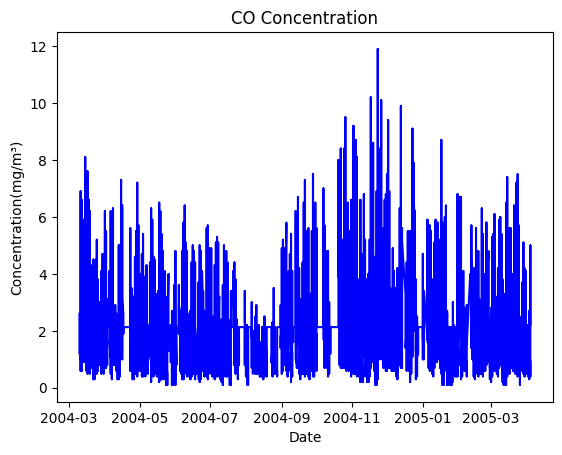

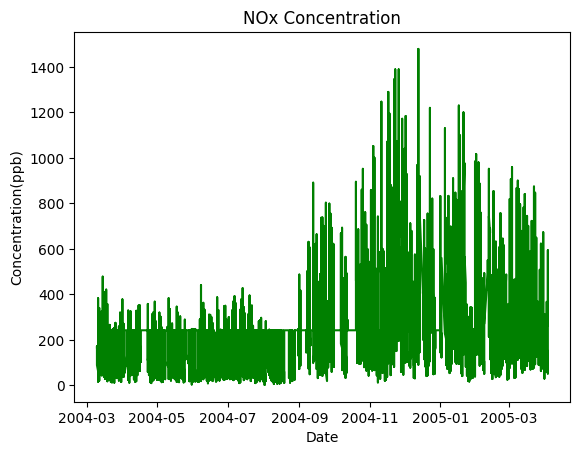

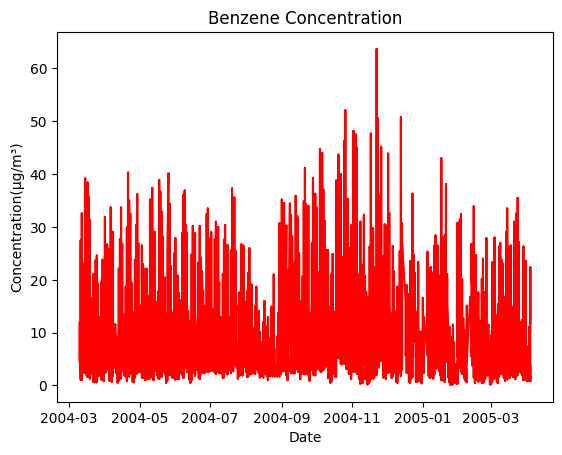

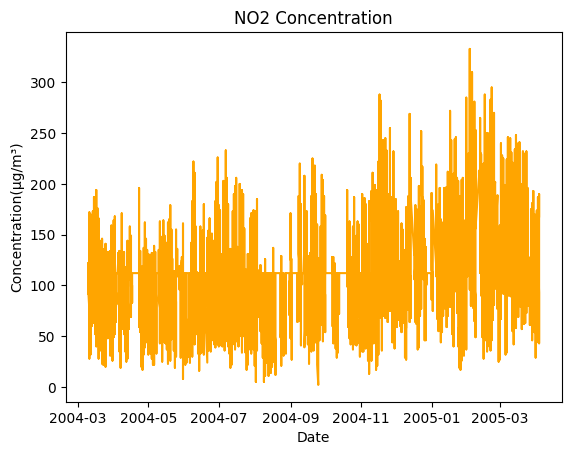

In [ ]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Plot CO concentration
plt.plot(df['Date'], df['CO(GT)'], color='blue')
plt.title('CO Concentration')
plt.xlabel('Date')
plt.ylabel('Concentration(mg/m³)')
plt.show()

# Plot NOx concentration
plt.plot(df['Date'], df['NOx(GT)'], color='green')
plt.title('NOx Concentration')
plt.xlabel('Date')
plt.ylabel('Concentration(ppb)')
plt.show()

# Plot Benzene concentration
plt.plot(df['Date'], df['C6H6(GT)'], label='Benzene Concentration', color='red')
plt.title('Benzene Concentration')
plt.xlabel('Date')
plt.ylabel('Concentration(µg/m³)')
plt.show()

# Plot NO2 concentration
plt.plot(df['Date'], df['NO2(GT)'], label='NO2 Concentration', color='orange')
plt.title('NO2 Concentration')
plt.xlabel('Date')
plt.ylabel('Concentration(µg/m³)')
plt.show()

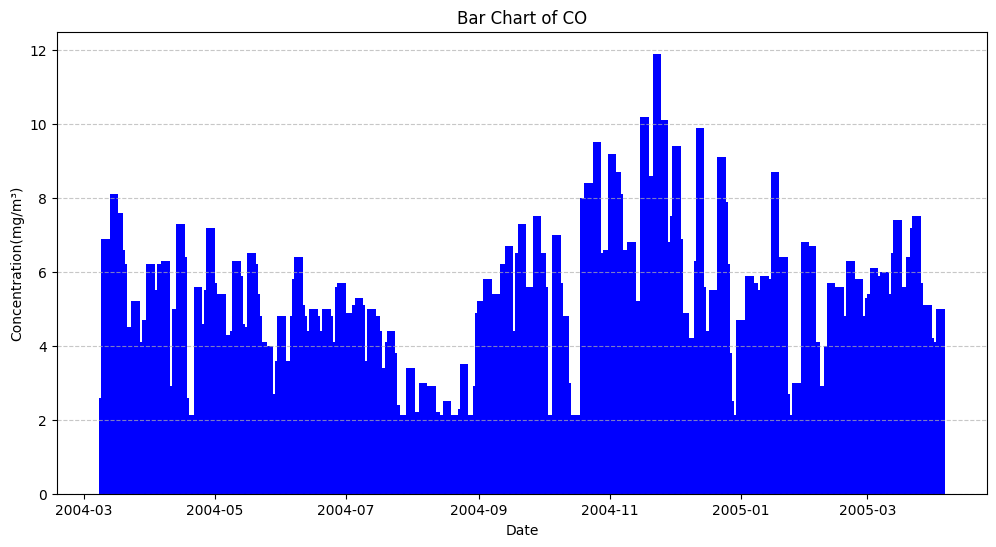

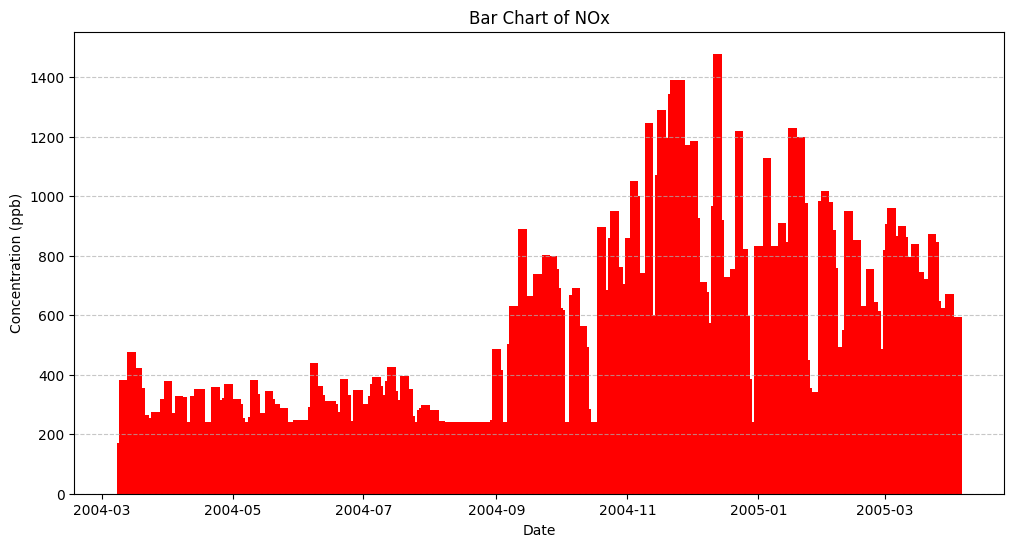

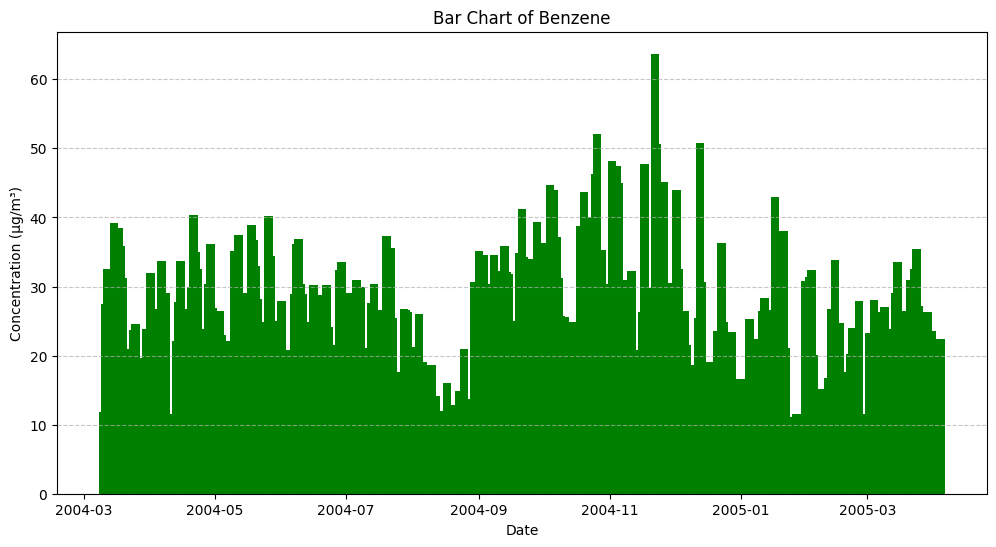

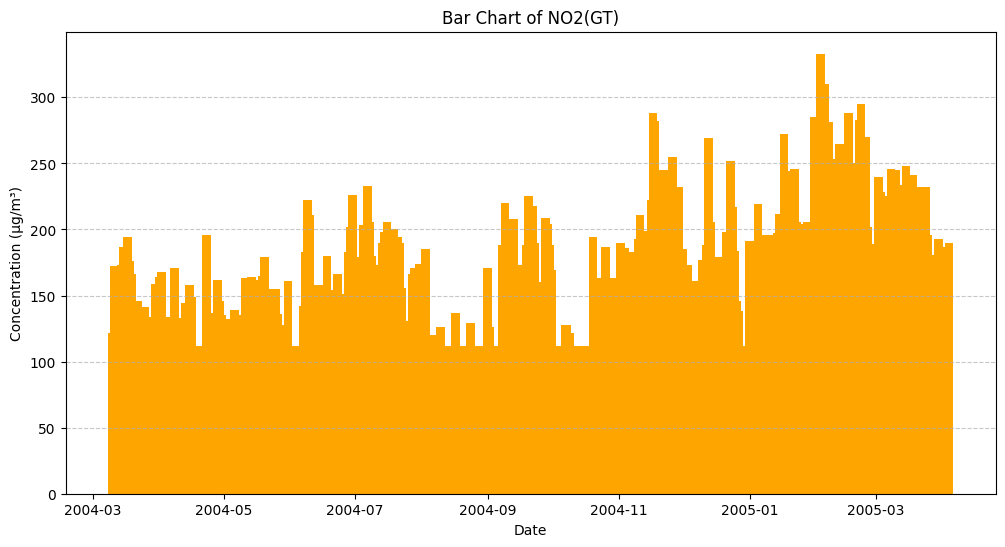

In [ ]:
# Plot bar graph
# Plot for CO
fig, ax = plt.subplots(figsize=(12, 6))
width = 4
ax.bar(df['Date'], df['CO(GT)'], width=width, color='blue')

ax.set_xlabel("Date")
ax.set_ylabel("Concentration(mg/m³)")
ax.set_title("Bar Chart of CO")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot for NOx
fig, ax = plt.subplots(figsize=(12, 6))
width = 4
ax.bar(df['Date'], df['NOx(GT)'], width=width, color='red')

ax.set_xlabel("Date")
ax.set_ylabel("Concentration (ppb)")
ax.set_title("Bar Chart of NOx")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot for Benzene
fig, ax = plt.subplots(figsize=(12, 6))
width = 4
ax.bar(df['Date'], df['C6H6(GT)'], width=width, color='green')

ax.set_xlabel("Date")
ax.set_ylabel("Concentration (µg/m³)")
ax.set_title("Bar Chart of Benzene")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot for NO2(GT)
fig, ax = plt.subplots(figsize=(12, 6))
width = 4
ax.bar(df['Date'], df['NO2(GT)'], width=width, color='orange')

ax.set_xlabel("Date")
ax.set_ylabel("Concentration (µg/m³)")
ax.set_title("Bar Chart of NO2(GT)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

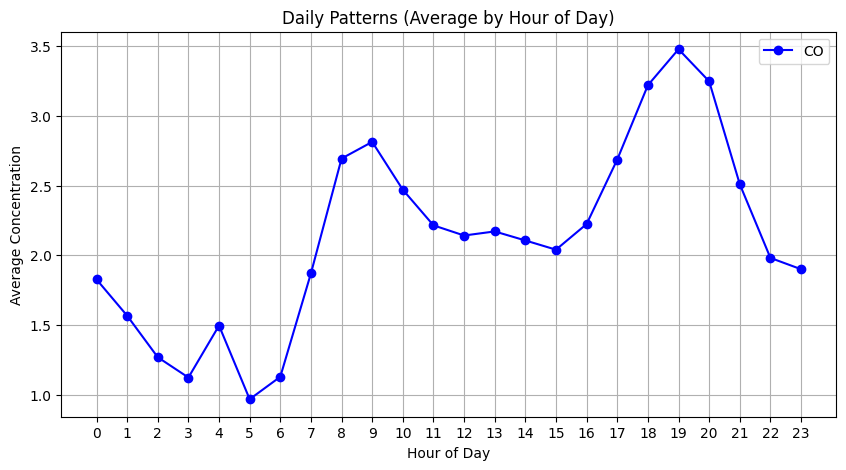

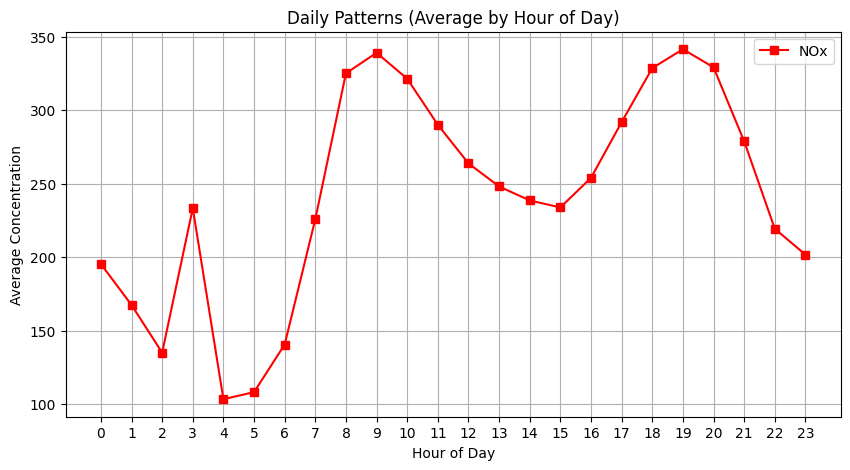

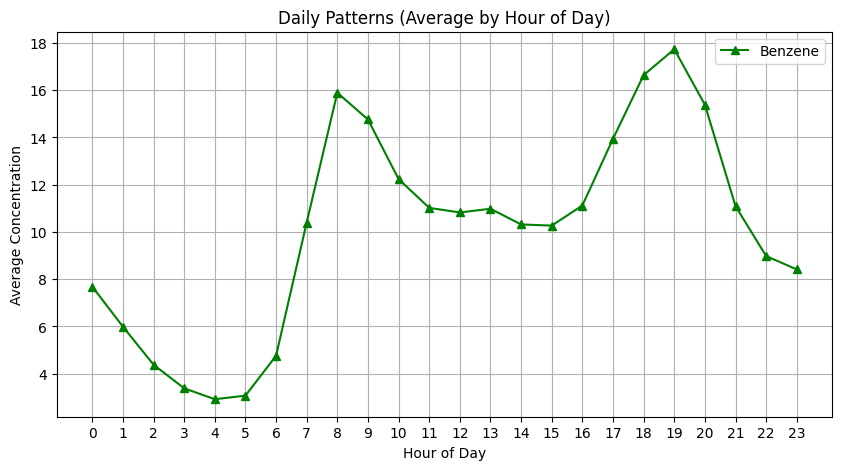

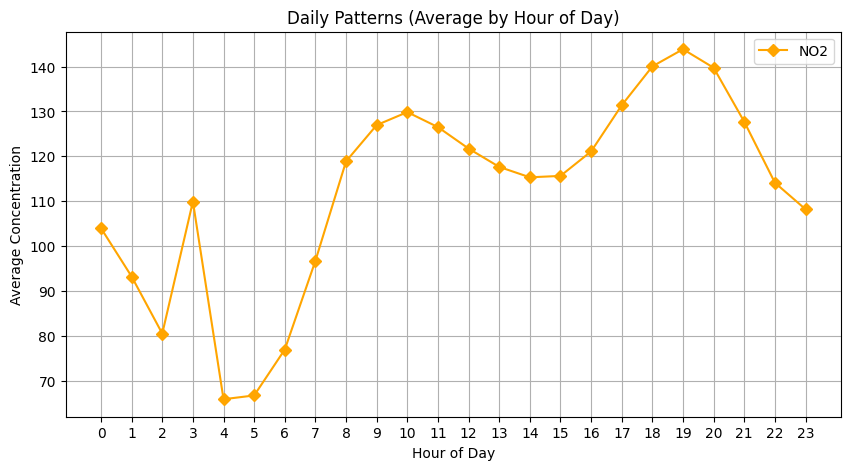

In [ ]:
# Daily / Weekly patterns

# Daily
# Format date
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].str.replace('.', ':'), format='%Y-%m-%d %H:%M:%S')
df['Hour'] = df['DateTime'].dt.hour

# Group by Hour and compute mean
hourly_avg = df.groupby('Hour')[['CO(GT)', 'NOx(GT)', 'C6H6(GT)', 'NO2(GT)']].mean()

# Plot Daily Pattern for CO
plt.figure(figsize=(10, 5))
plt.plot(hourly_avg.index, hourly_avg['CO(GT)'], marker='o', label='CO', color='blue')

plt.title('Daily Patterns (Average by Hour of Day)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Concentration')
plt.xticks(range(24))  # Set x-axis from 0 to 23 (hours)
plt.grid(True)
plt.legend()
plt.show()

# Plot Daily Pattern for NOx
plt.figure(figsize=(10, 5))
plt.plot(hourly_avg.index, hourly_avg['NOx(GT)'], marker='s', label='NOx', color='red')

plt.title('Daily Patterns (Average by Hour of Day)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Concentration')
plt.xticks(range(24))  # Set x-axis from 0 to 23 (hours)
plt.grid(True)
plt.legend()
plt.show()

# Plot Daily Pattern for Benzene
plt.figure(figsize=(10, 5))
plt.plot(hourly_avg.index, hourly_avg['C6H6(GT)'], marker='^', label='Benzene', color='green')

plt.title('Daily Patterns (Average by Hour of Day)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Concentration')
plt.xticks(range(24))  # Set x-axis from 0 to 23 (hours)
plt.grid(True)
plt.legend()
plt.show()

# Plot Daily Pattern for NO2
plt.figure(figsize=(10, 5))
plt.plot(hourly_avg.index, hourly_avg['NO2(GT)'], marker='D', label='NO2', color='orange')

plt.title('Daily Patterns (Average by Hour of Day)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Concentration')
plt.xticks(range(24))  # Set x-axis from 0 to 23 (hours)
plt.grid(True)
plt.legend()
plt.show()

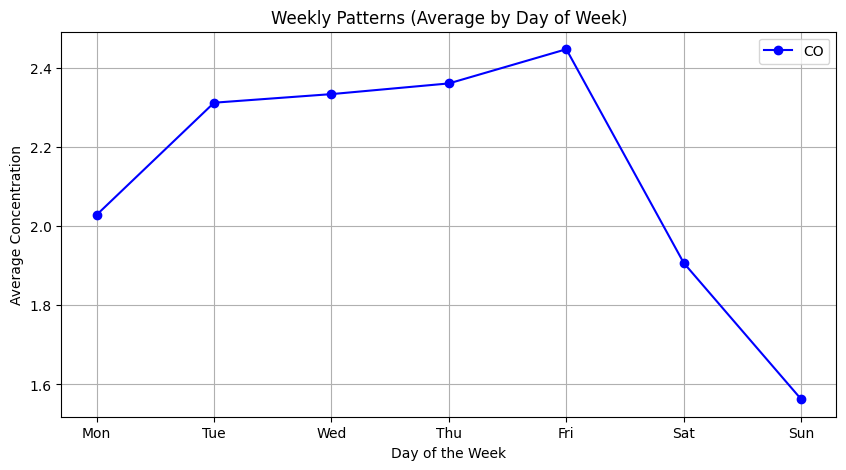

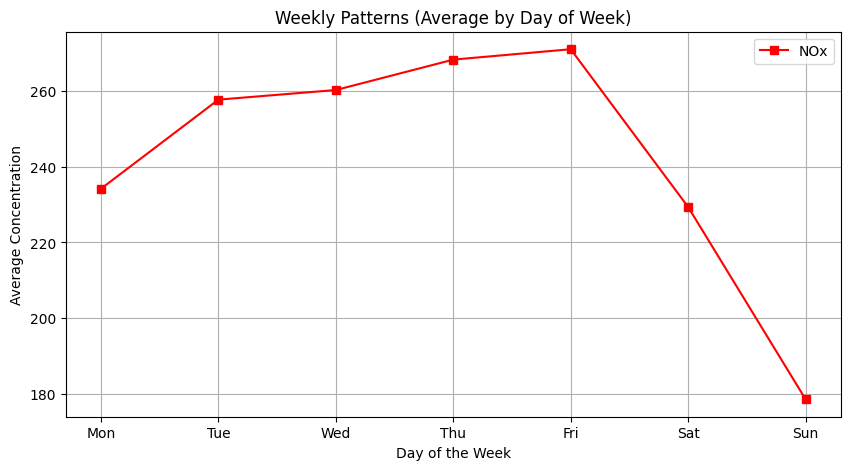

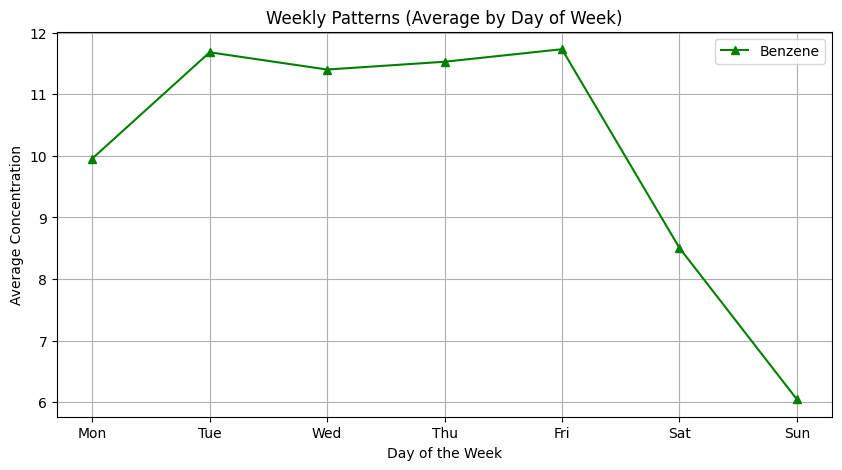

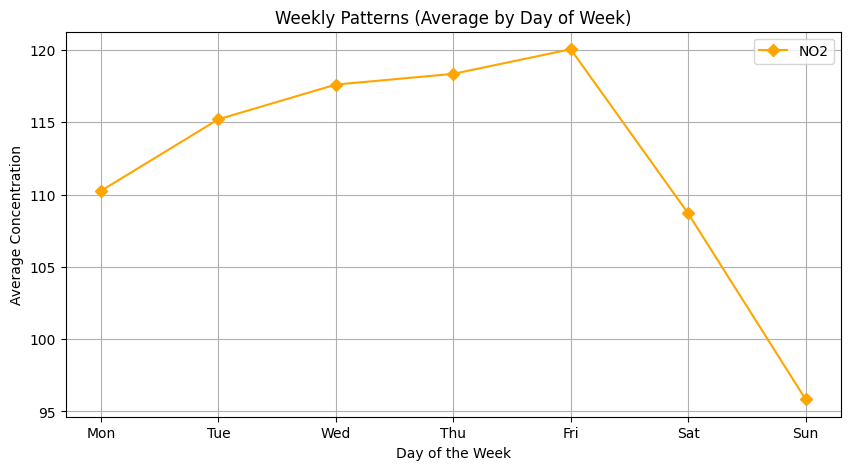

In [ ]:
# Daily / Weekly patterns

# Weekly
# Format date
df['Day_of_Week'] = df['DateTime'].dt.dayofweek

# Group by day of week and compute mean
weekly_avg = df.groupby('Day_of_Week')[['CO(GT)', 'NOx(GT)', 'C6H6(GT)', 'NO2(GT)']].mean()

# Define custom labels for days of the week
days_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Plot Weekly Pattern for CO
plt.figure(figsize=(10, 5))
plt.plot(weekly_avg.index, weekly_avg['CO(GT)'], marker='o', label='CO', color='blue')

plt.xticks(ticks=range(7), labels=days_labels)  # Set custom day labels
plt.title('Weekly Patterns (Average by Day of Week)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Concentration')
plt.grid(True)
plt.legend()
plt.show()

# Plot Weekly Pattern for NOx
plt.figure(figsize=(10, 5))
plt.plot(weekly_avg.index, weekly_avg['NOx(GT)'], marker='s', label='NOx', color='red')

plt.xticks(ticks=range(7), labels=days_labels)  # Set custom day labels
plt.title('Weekly Patterns (Average by Day of Week)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Concentration')
plt.grid(True)
plt.legend()
plt.show()

# Plot Weekly Pattern for Benzene
plt.figure(figsize=(10, 5))
plt.plot(weekly_avg.index, weekly_avg['C6H6(GT)'], marker='^', label='Benzene', color='green')

plt.xticks(ticks=range(7), labels=days_labels)  # Set custom day labels
plt.title('Weekly Patterns (Average by Day of Week)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Concentration')
plt.grid(True)
plt.legend()
plt.show()

# Plot Weekly Pattern for NO2
plt.figure(figsize=(10, 5))
plt.plot(weekly_avg.index, weekly_avg['NO2(GT)'], marker='D', label='NO2', color='orange')

plt.xticks(ticks=range(7), labels=days_labels)  # Set custom day labels
plt.title('Weekly Patterns (Average by Day of Week)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Concentration')
plt.grid(True)
plt.legend()
plt.show()

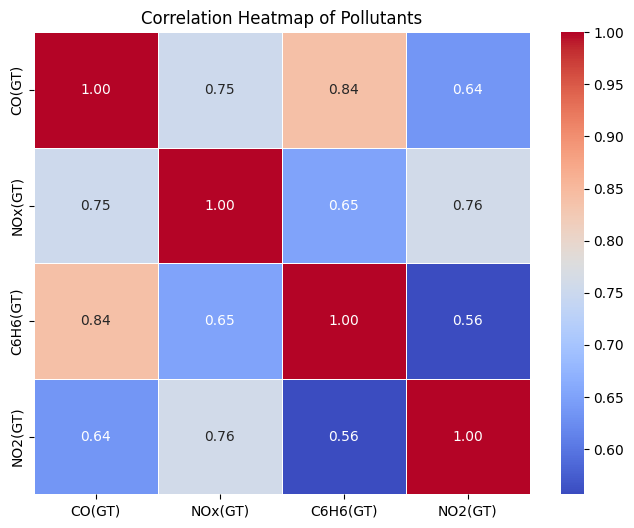

In [ ]:
# Correlation heatmap
# Compute correlation matrix

pollutant_data = df[['CO(GT)', 'NOx(GT)', 'C6H6(GT)','NO2(GT)']]
corr_matrix = pollutant_data.corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title("Correlation Heatmap of Pollutants")

# Show plot
plt.show()

<Figure size 1000x500 with 0 Axes>

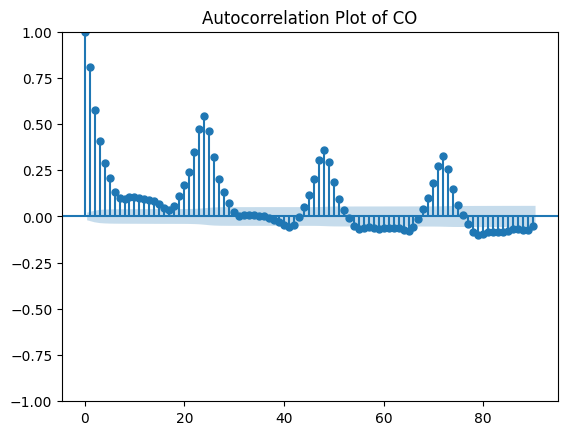

<Figure size 1000x500 with 0 Axes>

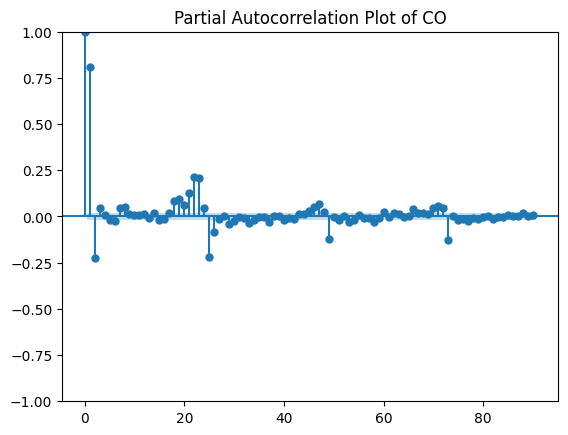

<Figure size 1000x500 with 0 Axes>

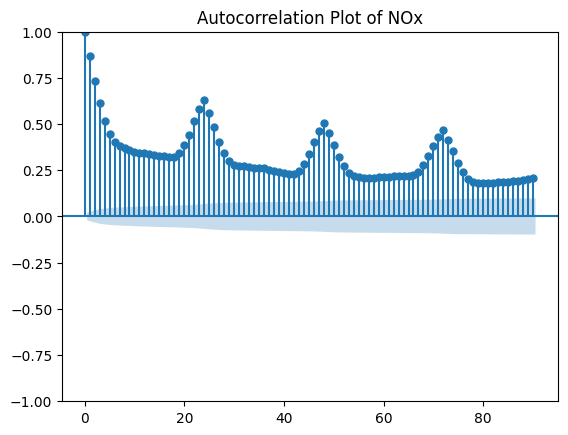

<Figure size 1000x500 with 0 Axes>

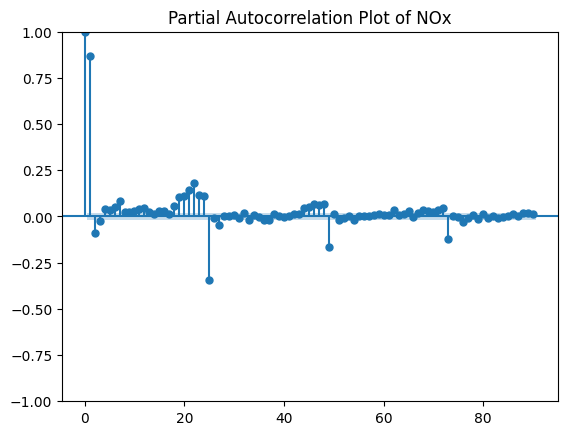

<Figure size 1000x500 with 0 Axes>

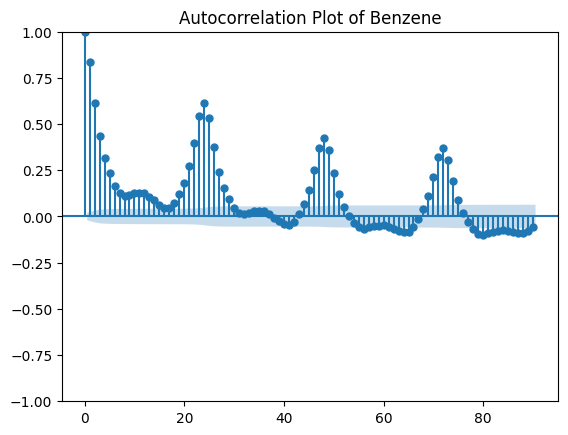

<Figure size 1000x500 with 0 Axes>

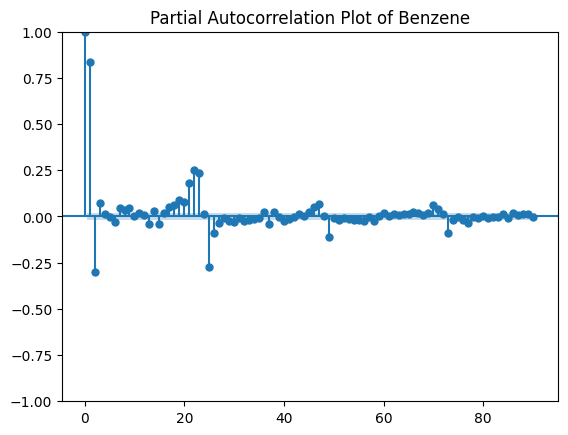

<Figure size 1000x500 with 0 Axes>

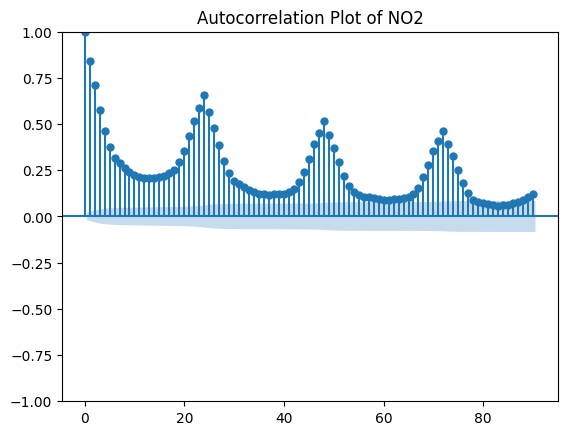

<Figure size 1000x500 with 0 Axes>

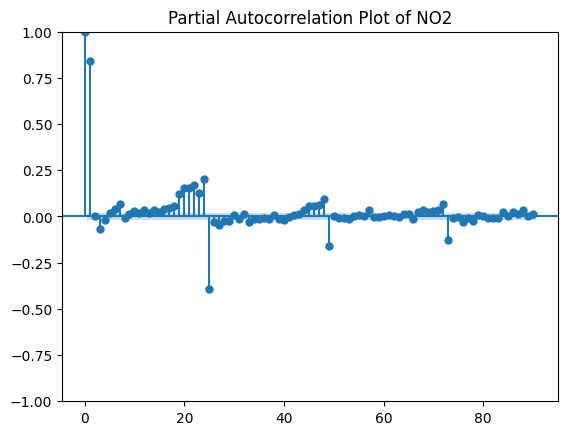

In [ ]:
# Set the 'DateTime' as the index
df.set_index('DateTime')

# Autocorrelation Plot (ACF) for CO
plt.figure(figsize=(10, 5))
plot_acf(df['CO(GT)'], lags=90)  # You can change 'lags' to the number of lags you want to analyze
plt.title('Autocorrelation Plot of CO')
plt.show()

# Partial Autocorrelation Plot (PACF) for CO
plt.figure(figsize=(10, 5))
plot_pacf(df['CO(GT)'], lags=90)  # You can change 'lags' to the number of lags you want to analyze
plt.title('Partial Autocorrelation Plot of CO')
plt.show()

# Autocorrelation Plot (ACF) for NOx
plt.figure(figsize=(10, 5))
plot_acf(df['NOx(GT)'], lags=90)  # You can change 'lags' to the number of lags you want to analyze
plt.title('Autocorrelation Plot of NOx')
plt.show()

# Partial Autocorrelation Plot (PACF) for NOx
plt.figure(figsize=(10, 5))
plot_pacf(df['NOx(GT)'], lags=90)  # You can change 'lags' to the number of lags you want to analyze
plt.title('Partial Autocorrelation Plot of NOx')
plt.show()

# Autocorrelation Plot (ACF) for Benzene
plt.figure(figsize=(10, 5))
plot_acf(df['C6H6(GT)'], lags=90)  # You can change 'lags' to the number of lags you want to analyze
plt.title('Autocorrelation Plot of Benzene')
plt.show()

# Partial Autocorrelation Plot (PACF) for Benzene
plt.figure(figsize=(10, 5))
plot_pacf(df['C6H6(GT)'], lags=90)  # You can change 'lags' to the number of lags you want to analyze
plt.title('Partial Autocorrelation Plot of Benzene')
plt.show()

# Autocorrelation Plot (ACF) for NO2
plt.figure(figsize=(10, 5))
plot_acf(df['NO2(GT)'], lags=90)  # You can change 'lags' to the number of lags you want to analyze
plt.title('Autocorrelation Plot of NO2')
plt.show()

# Partial Autocorrelation Plot (PACF) for NO2
plt.figure(figsize=(10, 5))
plot_pacf(df['NO2(GT)'], lags=90)  # You can change 'lags' to the number of lags you want to analyze
plt.title('Partial Autocorrelation Plot of NO2')
plt.show()

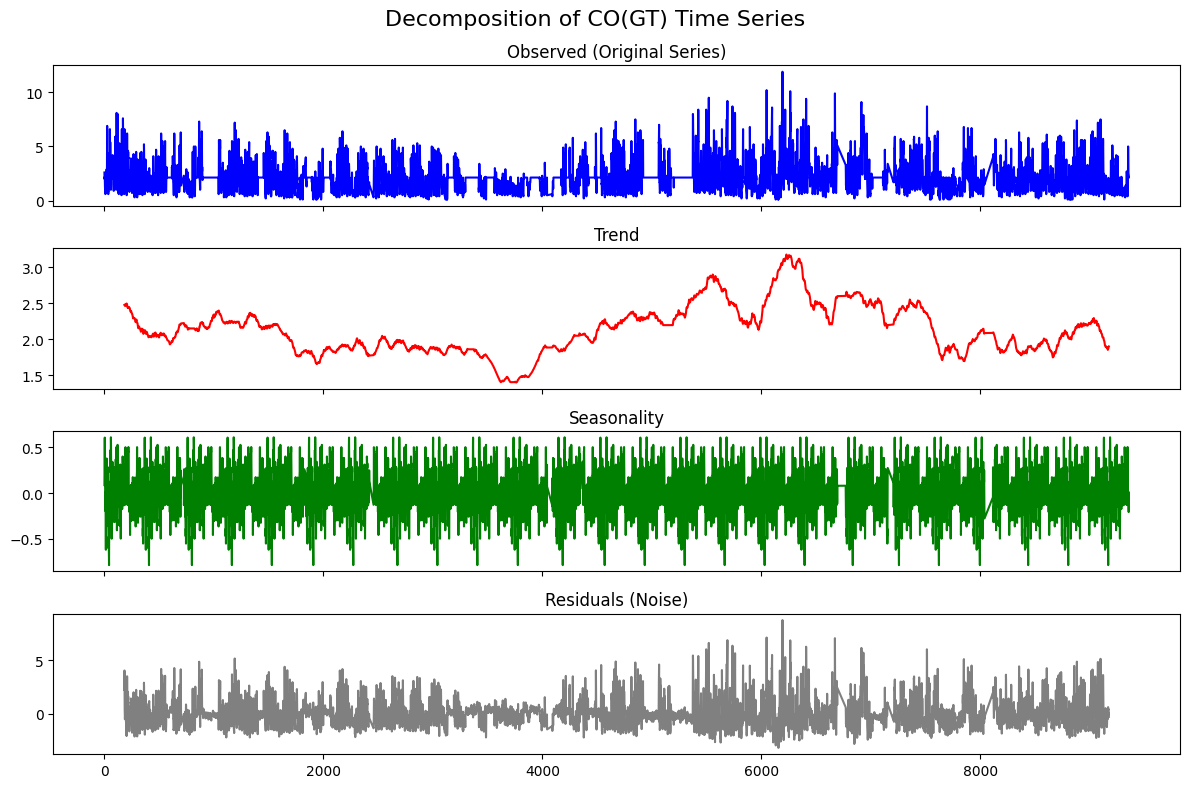

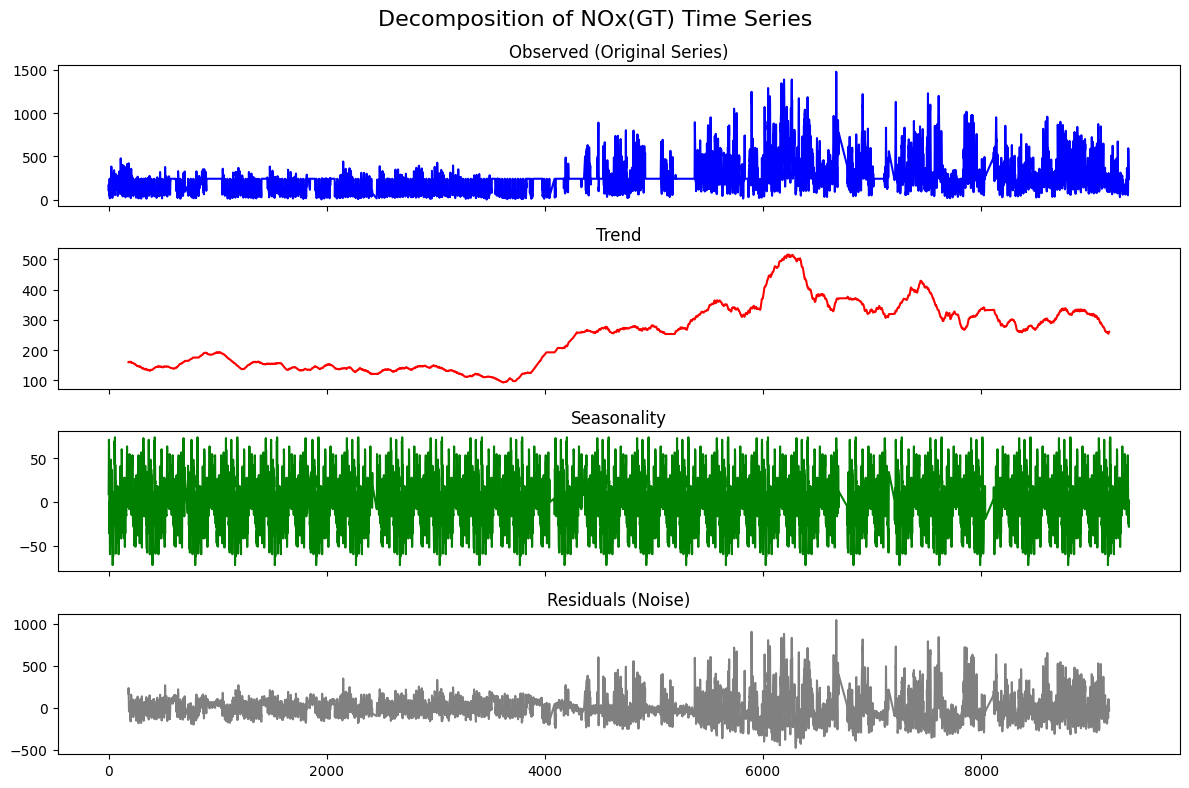

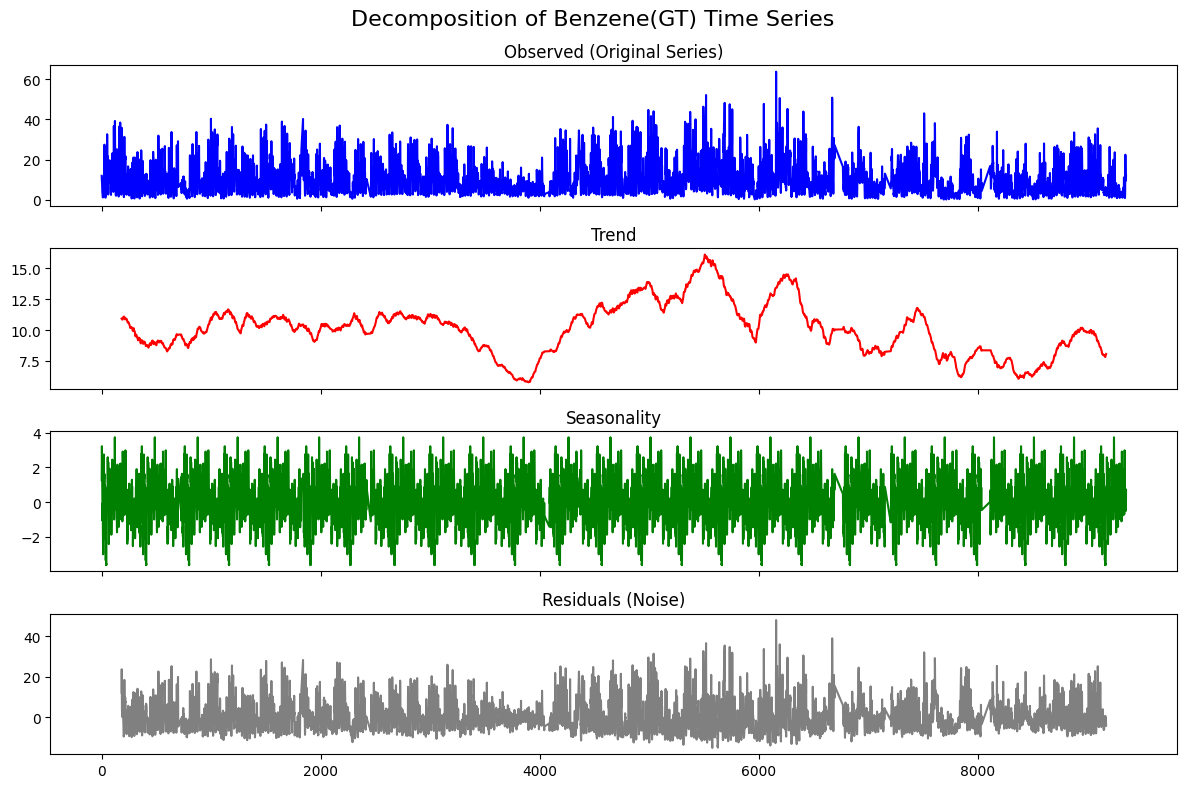

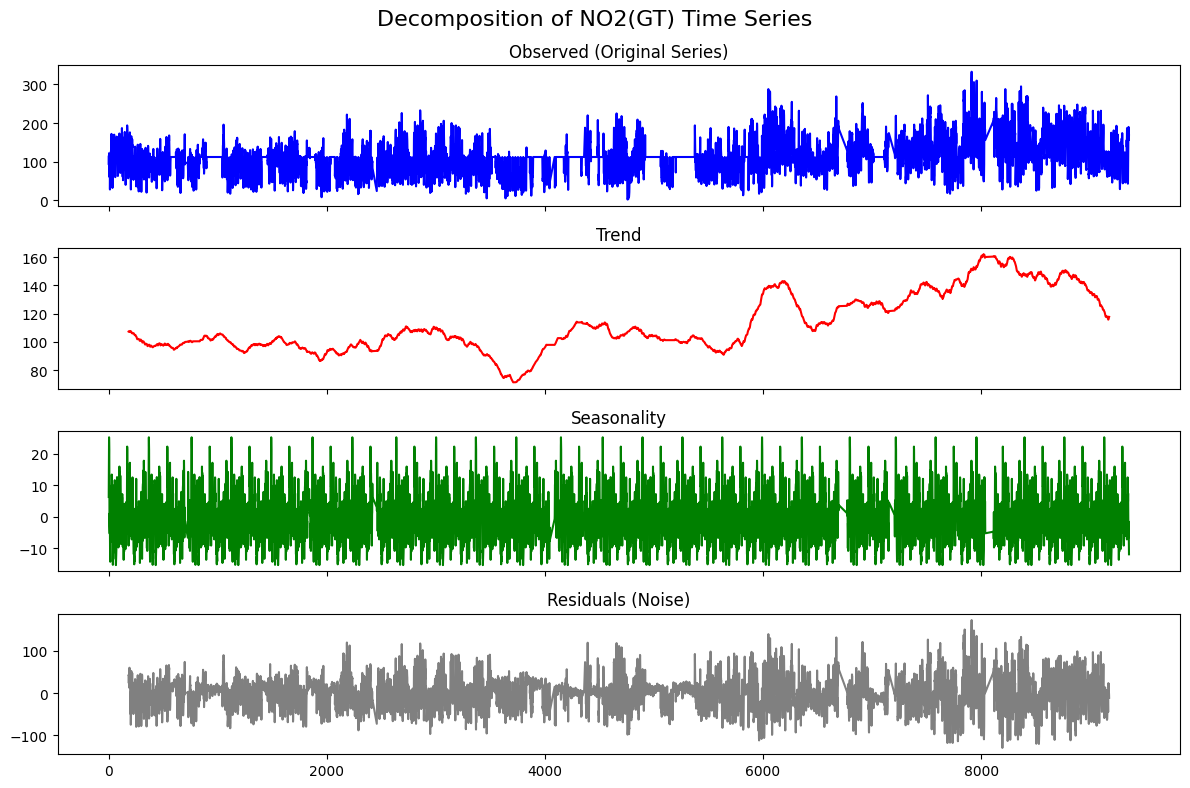

In [ ]:
# Decompose the time series into trend, seasonal, and residual components
# CO
ts_co = df['CO(GT)']

# STL Decomposition
decomposition = seasonal_decompose(ts_co, model='additive', period=365)  # 'period' depends on data frequency

# Plot the Decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

decomposition.observed.plot(ax=axes[0], color='blue', title="Observed (Original Series)")
decomposition.trend.plot(ax=axes[1], color='red', title="Trend")
decomposition.seasonal.plot(ax=axes[2], color='green', title="Seasonality")
decomposition.resid.plot(ax=axes[3], color='gray', title="Residuals (Noise)")

plt.suptitle("Decomposition of CO(GT) Time Series", fontsize=16)

plt.tight_layout()
plt.show()

# NOx
ts_co = df['NOx(GT)']

# STL Decomposition
decomposition = seasonal_decompose(ts_co, model='additive', period=365)  # 'period' depends on data frequency

# Plot the Decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

decomposition.observed.plot(ax=axes[0], color='blue', title="Observed (Original Series)")
decomposition.trend.plot(ax=axes[1], color='red', title="Trend")
decomposition.seasonal.plot(ax=axes[2], color='green', title="Seasonality")
decomposition.resid.plot(ax=axes[3], color='gray', title="Residuals (Noise)")
plt.suptitle("Decomposition of NOx(GT) Time Series", fontsize=16)

plt.tight_layout()
plt.show()

# Benzene
ts_co = df['C6H6(GT)']

# STL Decomposition
decomposition = seasonal_decompose(ts_co, model='additive', period=365)  # 'period' depends on data frequency

# Plot the Decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

decomposition.observed.plot(ax=axes[0], color='blue', title="Observed (Original Series)")
decomposition.trend.plot(ax=axes[1], color='red', title="Trend")
decomposition.seasonal.plot(ax=axes[2], color='green', title="Seasonality")
decomposition.resid.plot(ax=axes[3], color='gray', title="Residuals (Noise)")
# Add a title for the entire figure
plt.suptitle("Decomposition of Benzene(GT) Time Series", fontsize=16)

plt.tight_layout()
plt.show()

# NO2
ts_co = df['NO2(GT)']

# STL Decomposition
decomposition = seasonal_decompose(ts_co, model='additive', period=365)  # 'period' depends on data frequency

# Plot the Decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

decomposition.observed.plot(ax=axes[0], color='blue', title="Observed (Original Series)")
decomposition.trend.plot(ax=axes[1], color='red', title="Trend")
decomposition.seasonal.plot(ax=axes[2], color='green', title="Seasonality")
decomposition.resid.plot(ax=axes[3], color='gray', title="Residuals (Noise)")
# Add a title for the entire figure
plt.suptitle("Decomposition of NO2(GT) Time Series", fontsize=16)

plt.tight_layout()
plt.show()

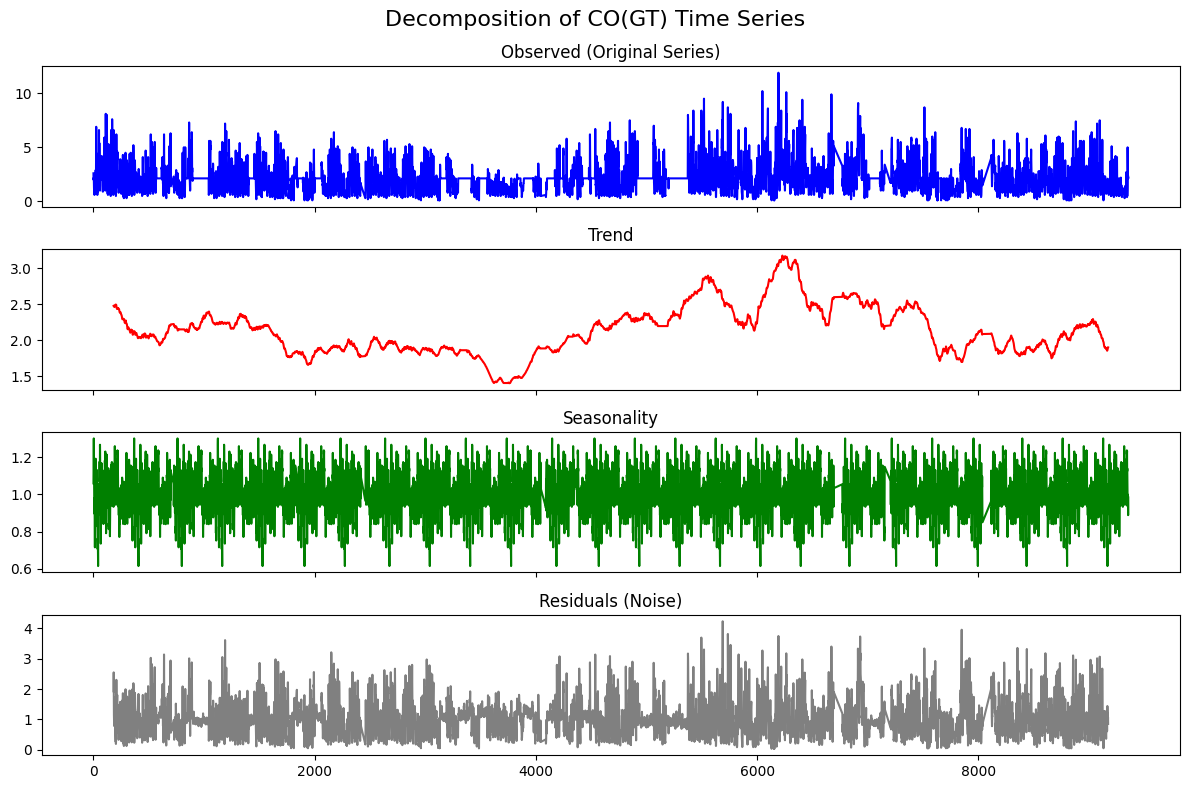

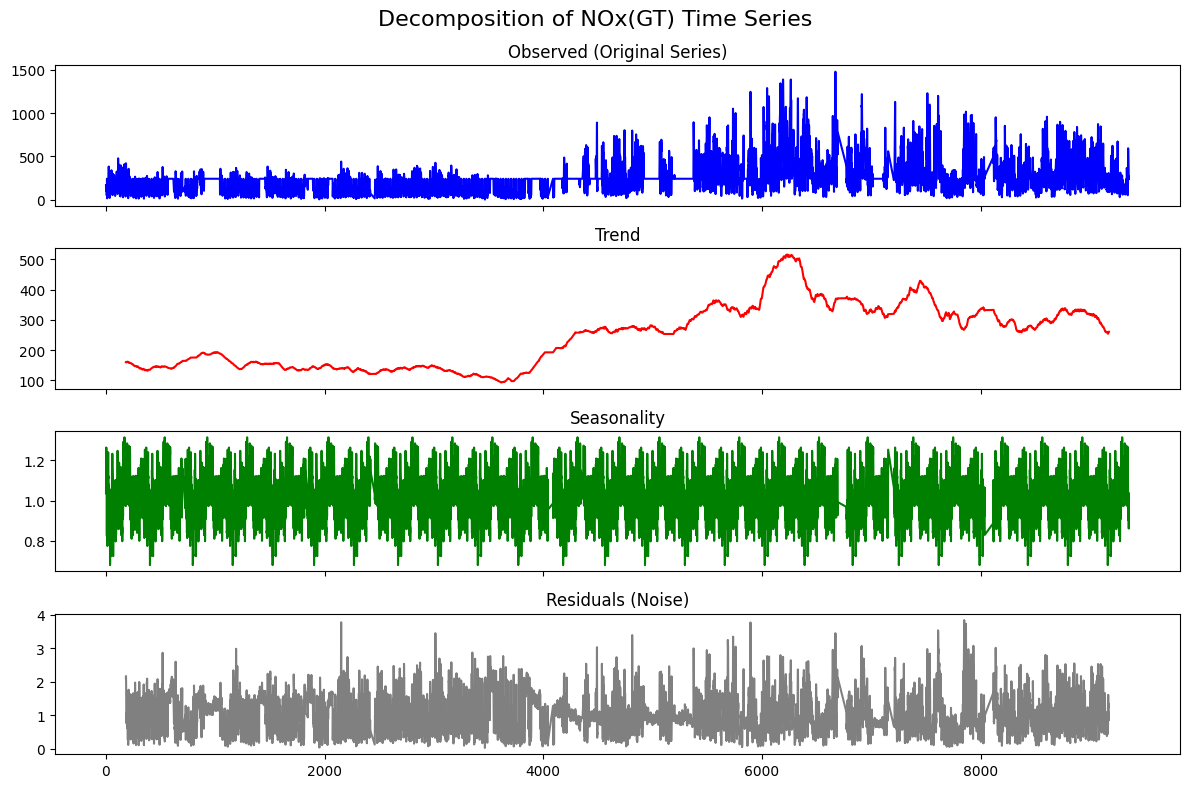

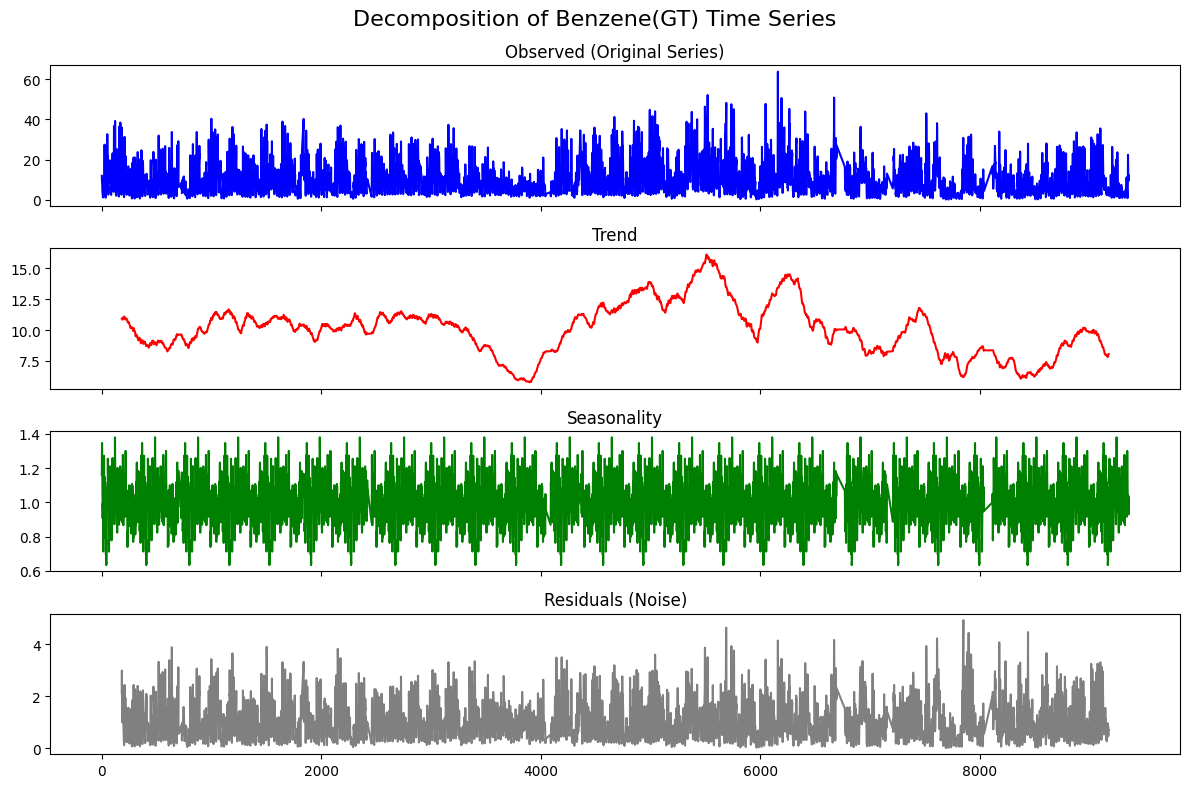

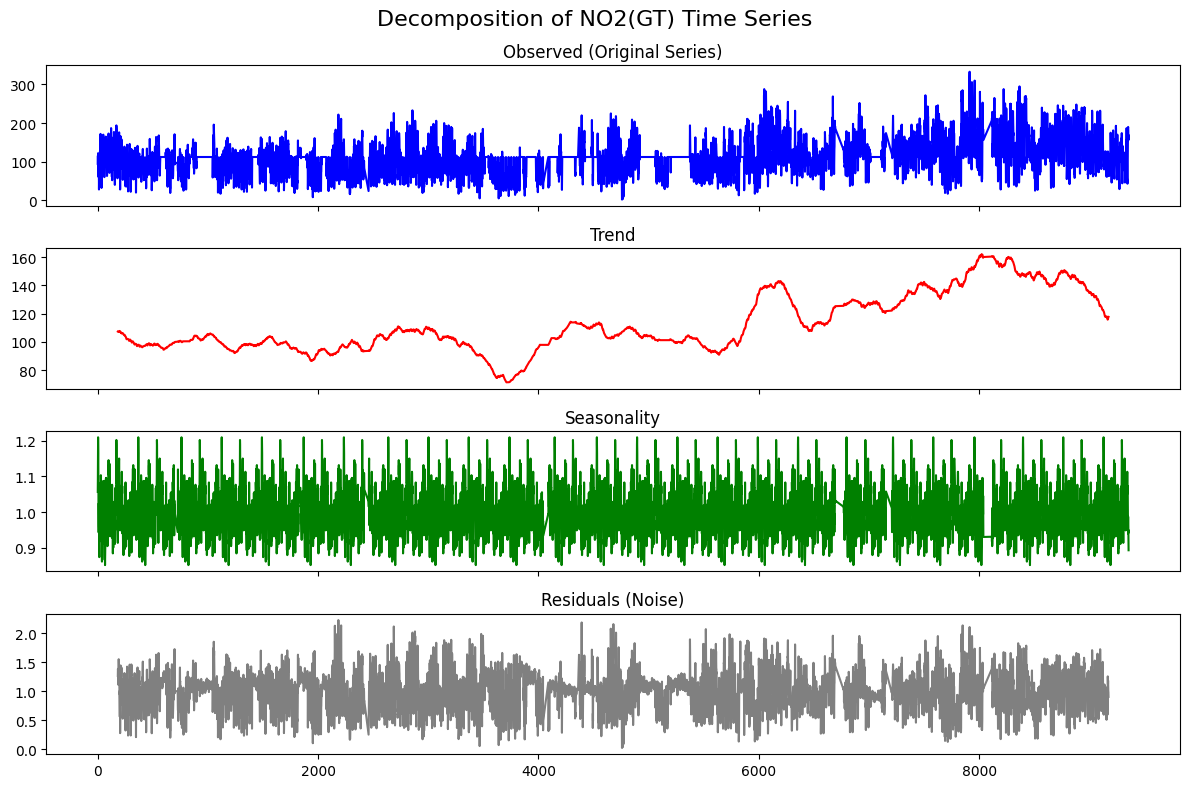

In [ ]:
# Decompose the time series into trend, seasonal, and residual components
# Multiplicative
# CO
ts_co = df['CO(GT)']

# STL Decomposition
decomposition = seasonal_decompose(ts_co, model='multiplicative', period=365)  # 'period' depends on data frequency

# Plot the Decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

decomposition.observed.plot(ax=axes[0], color='blue', title="Observed (Original Series)")
decomposition.trend.plot(ax=axes[1], color='red', title="Trend")
decomposition.seasonal.plot(ax=axes[2], color='green', title="Seasonality")
decomposition.resid.plot(ax=axes[3], color='gray', title="Residuals (Noise)")

plt.suptitle("Decomposition of CO(GT) Time Series", fontsize=16)

plt.tight_layout()
plt.show()

# NOx
ts_co = df['NOx(GT)']

# STL Decomposition
decomposition = seasonal_decompose(ts_co, model='multiplicative', period=365)  # 'period' depends on data frequency

# Plot the Decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

decomposition.observed.plot(ax=axes[0], color='blue', title="Observed (Original Series)")
decomposition.trend.plot(ax=axes[1], color='red', title="Trend")
decomposition.seasonal.plot(ax=axes[2], color='green', title="Seasonality")
decomposition.resid.plot(ax=axes[3], color='gray', title="Residuals (Noise)")
plt.suptitle("Decomposition of NOx(GT) Time Series", fontsize=16)

plt.tight_layout()
plt.show()

# Benzene
ts_co = df['C6H6(GT)']

# STL Decomposition
decomposition = seasonal_decompose(ts_co, model='multiplicative', period=365)  # 'period' depends on data frequency

# Plot the Decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

decomposition.observed.plot(ax=axes[0], color='blue', title="Observed (Original Series)")
decomposition.trend.plot(ax=axes[1], color='red', title="Trend")
decomposition.seasonal.plot(ax=axes[2], color='green', title="Seasonality")
decomposition.resid.plot(ax=axes[3], color='gray', title="Residuals (Noise)")
# Add a title for the entire figure
plt.suptitle("Decomposition of Benzene(GT) Time Series", fontsize=16)

plt.tight_layout()
plt.show()

# NO2
ts_co = df['NO2(GT)']

# STL Decomposition
decomposition = seasonal_decompose(ts_co, model='multiplicative', period=365)  # 'period' depends on data frequency

# Plot the Decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

decomposition.observed.plot(ax=axes[0], color='blue', title="Observed (Original Series)")
decomposition.trend.plot(ax=axes[1], color='red', title="Trend")
decomposition.seasonal.plot(ax=axes[2], color='green', title="Seasonality")
decomposition.resid.plot(ax=axes[3], color='gray', title="Residuals (Noise)")
# Add a title for the entire figure
plt.suptitle("Decomposition of NO2(GT) Time Series", fontsize=16)

plt.tight_layout()
plt.show()

Linear Regression - MSE: 1.56, MAE: 0.91
Random Forest - MSE: 0.42, MAE: 0.45
XGBoost - MSE: 0.54, MAE: 0.52


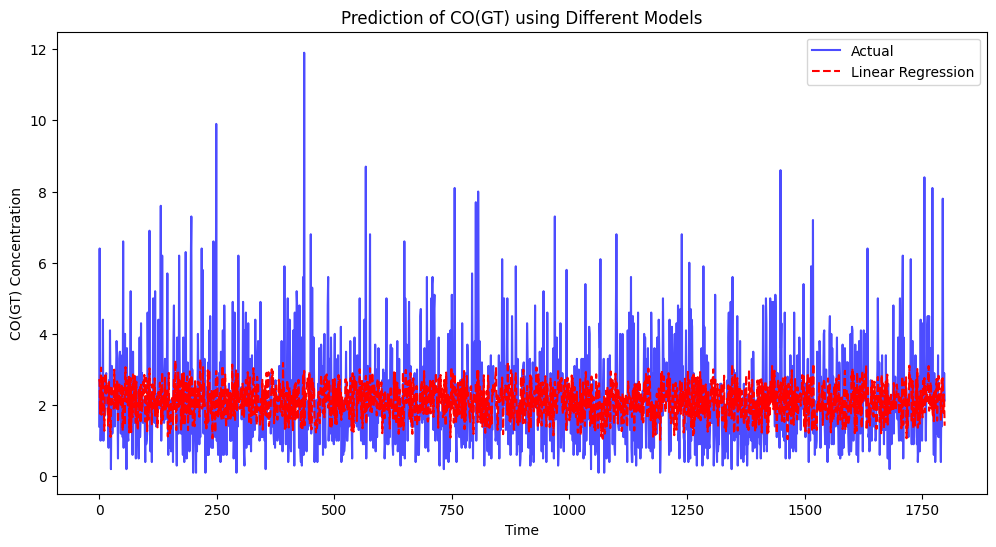

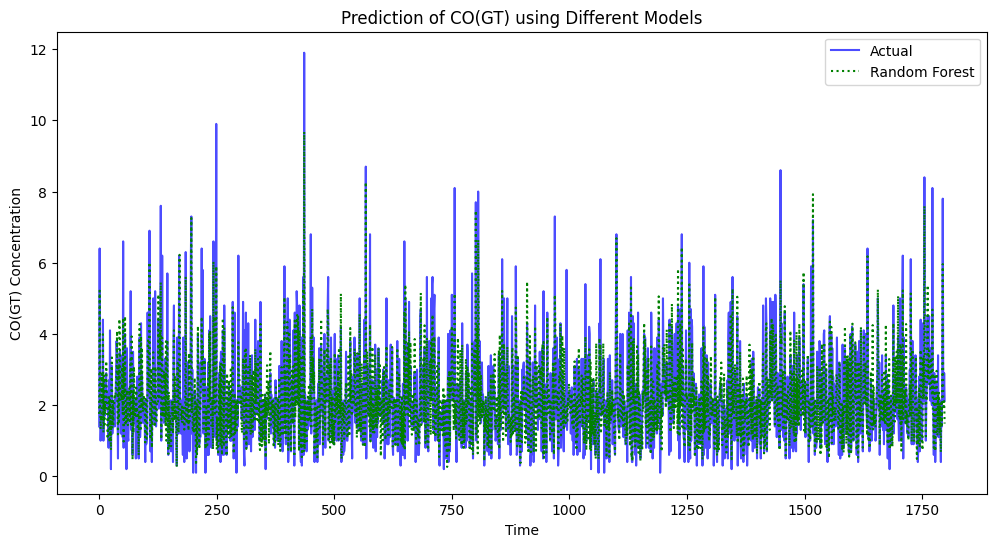

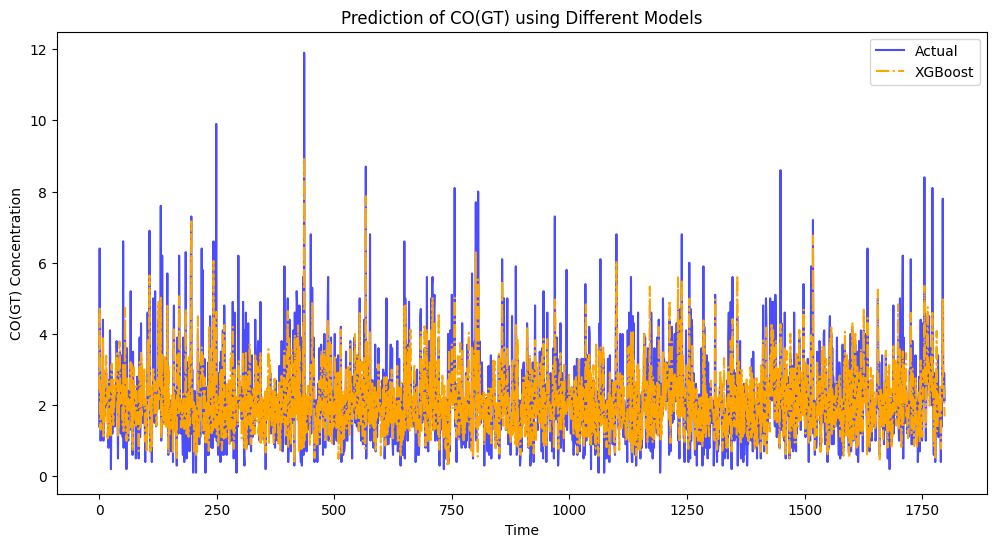

Linear Regression - MSE: 27612.65, MAE: 116.51
Random Forest - MSE: 4867.19, MAE: 42.89
XGBoost - MSE: 7257.01, MAE: 56.86


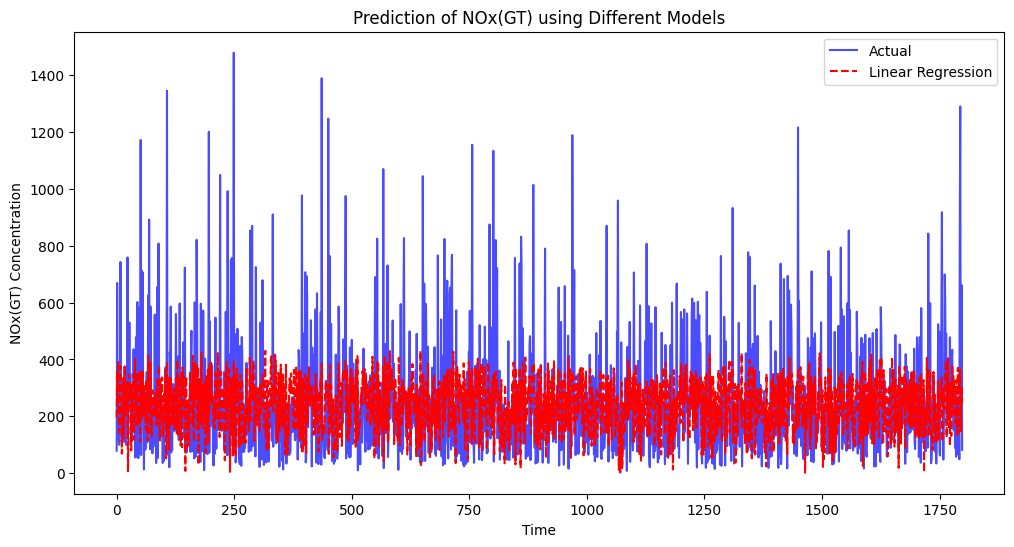

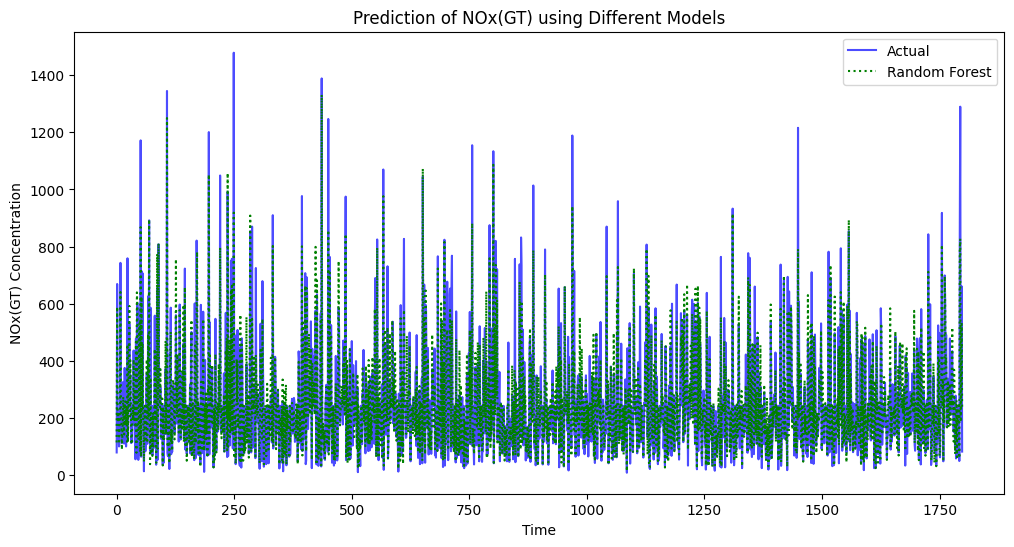

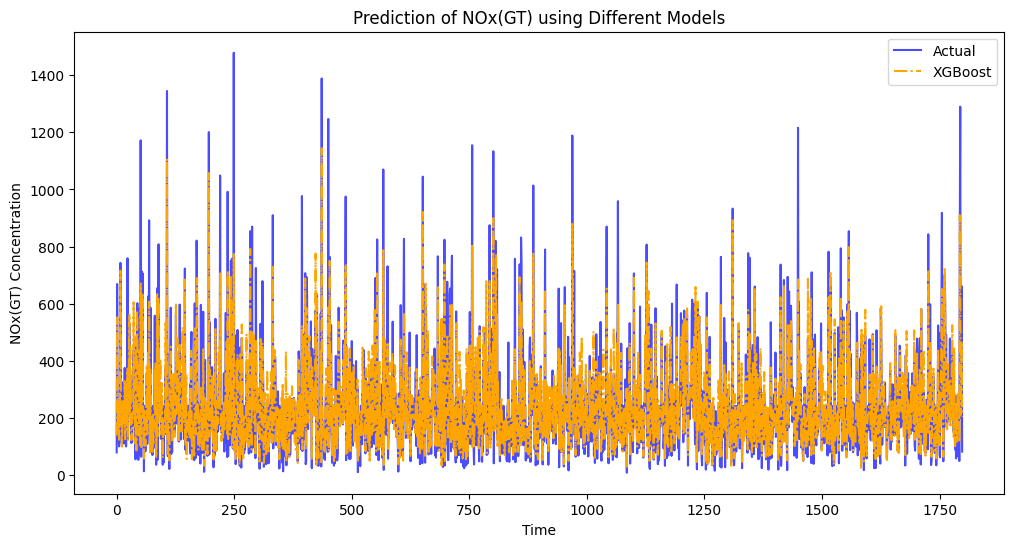

Linear Regression - MSE: 48.70, MAE: 5.22
Random Forest - MSE: 10.64, MAE: 2.20
XGBoost - MSE: 12.45, MAE: 2.39


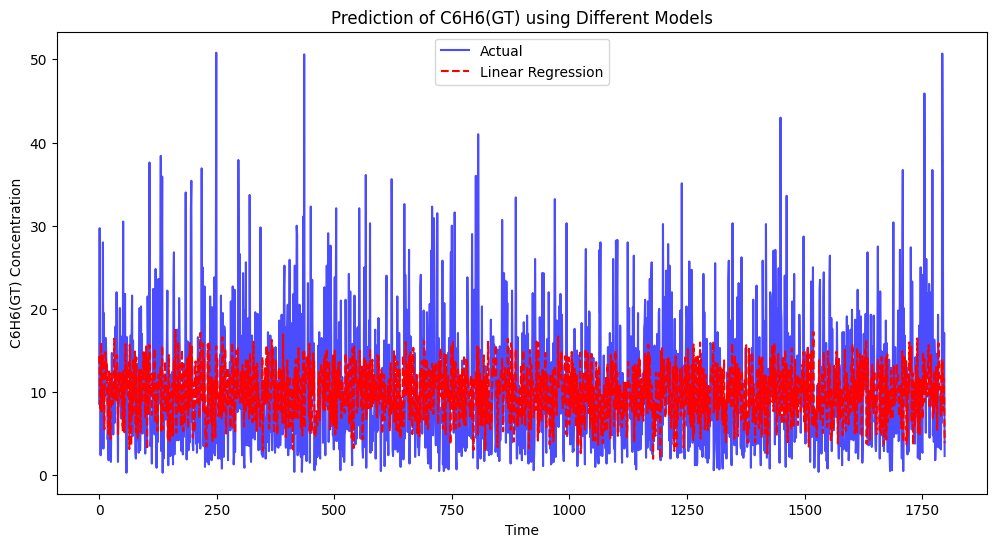

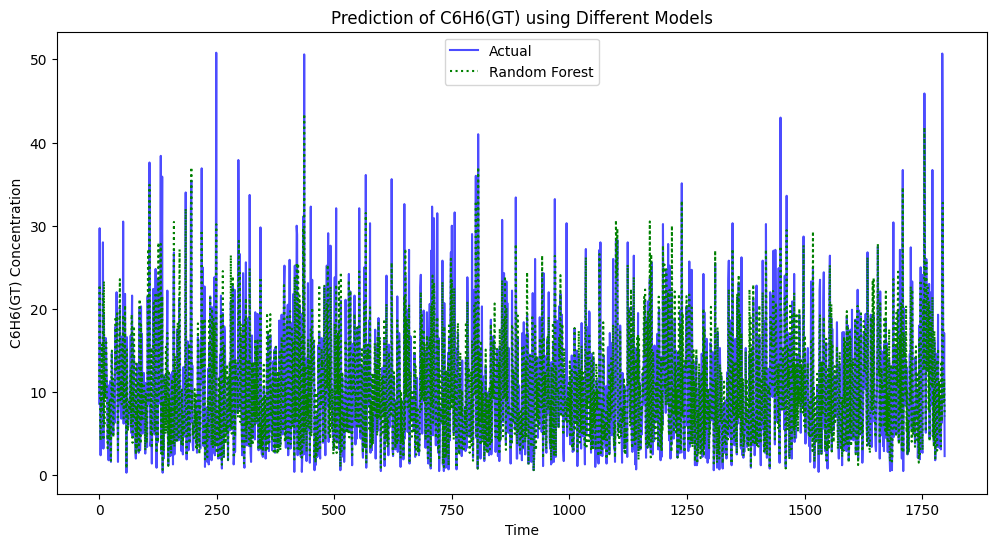

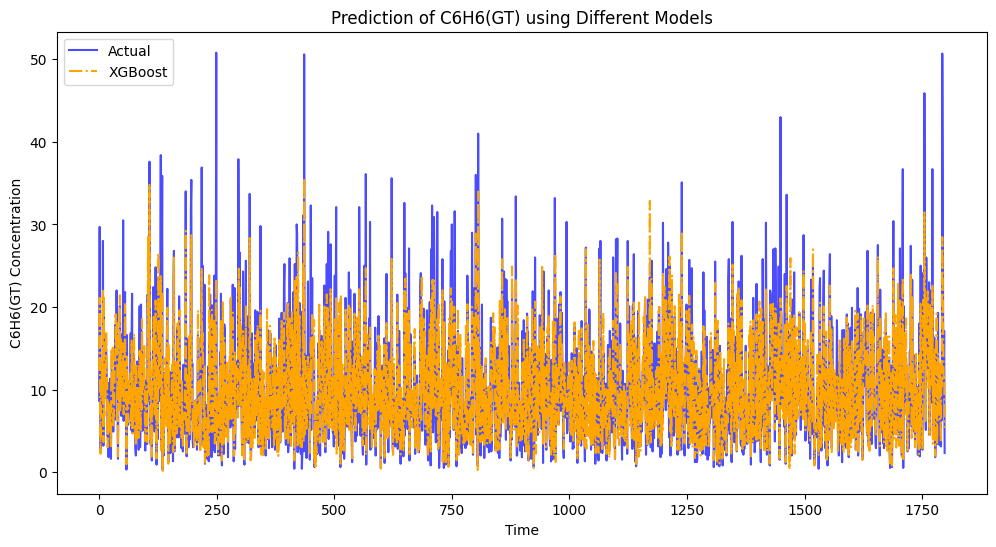

In [ ]:
# Model prediction
# Extract time-based features
df['year'] = df['DateTime'].dt.year
df['month'] = df['DateTime'].dt.month
df['day'] = df['DateTime'].dt.day
df['day_of_week'] = df['DateTime'].dt.dayofweek
df['day_of_year'] = df['DateTime'].dt.dayofyear
df['hour'] = df['DateTime'].dt.hour

# Fit model for CO
target_pollutant = 'CO(GT)'
features = ['year', 'month', 'day', 'day_of_week', 'day_of_year', 'hour']

X = df[features]
y = df[target_pollutant]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and Evaluate Models

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{model_name} - MSE: {mse:.2f}, MAE: {mae:.2f}")
    return y_pred

# 1. Linear Regression
lr_model = LinearRegression()
y_pred_lr = evaluate_model(lr_model, X_train, X_test, y_train, y_test, "Linear Regression")

# 2. Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
y_pred_rf = evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest")

# 3. XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
y_pred_xgb = evaluate_model(xgb_model, X_train, X_test, y_train, y_test, "XGBoost")

# Visualize Predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", color="blue", alpha=0.7)
plt.plot(y_pred_lr, label="Linear Regression", linestyle="dashed", color="red")
plt.legend()
plt.title(f"Prediction of {target_pollutant} using Different Models")
plt.xlabel("Time")
plt.ylabel(f"{target_pollutant} Concentration")
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", color="blue", alpha=0.7)
plt.plot(y_pred_rf, label="Random Forest", linestyle="dotted", color="green")
plt.legend()
plt.title(f"Prediction of {target_pollutant} using Different Models")
plt.xlabel("Time")
plt.ylabel(f"{target_pollutant} Concentration")
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", color="blue", alpha=0.7)
plt.plot(y_pred_xgb, label="XGBoost", linestyle="dashdot", color="orange")
plt.legend()
plt.title(f"Prediction of {target_pollutant} using Different Models")
plt.xlabel("Time")
plt.ylabel(f"{target_pollutant} Concentration")
plt.show()

# Fit model for NOx
target_pollutant = 'NOx(GT)'
features = ['year', 'month', 'day', 'day_of_week', 'day_of_year', 'hour']

X = df[features]
y = df[target_pollutant]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and Evaluate Models

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{model_name} - MSE: {mse:.2f}, MAE: {mae:.2f}")
    return y_pred

# 1. Linear Regression
lr_model = LinearRegression()
y_pred_lr = evaluate_model(lr_model, X_train, X_test, y_train, y_test, "Linear Regression")

# 2. Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
y_pred_rf = evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest")

# 3. XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
y_pred_xgb = evaluate_model(xgb_model, X_train, X_test, y_train, y_test, "XGBoost")

# Visualize Predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", color="blue", alpha=0.7)
plt.plot(y_pred_lr, label="Linear Regression", linestyle="dashed", color="red")
plt.legend()
plt.title(f"Prediction of {target_pollutant} using Different Models")
plt.xlabel("Time")
plt.ylabel(f"{target_pollutant} Concentration")
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", color="blue", alpha=0.7)
plt.plot(y_pred_rf, label="Random Forest", linestyle="dotted", color="green")
plt.legend()
plt.title(f"Prediction of {target_pollutant} using Different Models")
plt.xlabel("Time")
plt.ylabel(f"{target_pollutant} Concentration")
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", color="blue", alpha=0.7)
plt.plot(y_pred_xgb, label="XGBoost", linestyle="dashdot", color="orange")
plt.legend()
plt.title(f"Prediction of {target_pollutant} using Different Models")
plt.xlabel("Time")
plt.ylabel(f"{target_pollutant} Concentration")
plt.show()

# Fit model for Benzene
target_pollutant = 'C6H6(GT)'
features = ['year', 'month', 'day', 'day_of_week', 'day_of_year', 'hour']

X = df[features]
y = df[target_pollutant]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and Evaluate Models

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{model_name} - MSE: {mse:.2f}, MAE: {mae:.2f}")
    return y_pred

# 1. Linear Regression
lr_model = LinearRegression()
y_pred_lr = evaluate_model(lr_model, X_train, X_test, y_train, y_test, "Linear Regression")

# 2. Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
y_pred_rf = evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest")

# 3. XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
y_pred_xgb = evaluate_model(xgb_model, X_train, X_test, y_train, y_test, "XGBoost")

# Visualize Predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", color="blue", alpha=0.7)
plt.plot(y_pred_lr, label="Linear Regression", linestyle="dashed", color="red")
plt.legend()
plt.title(f"Prediction of {target_pollutant} using Different Models")
plt.xlabel("Time")
plt.ylabel(f"{target_pollutant} Concentration")
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", color="blue", alpha=0.7)
plt.plot(y_pred_rf, label="Random Forest", linestyle="dotted", color="green")
plt.legend()
plt.title(f"Prediction of {target_pollutant} using Different Models")
plt.xlabel("Time")
plt.ylabel(f"{target_pollutant} Concentration")
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", color="blue", alpha=0.7)
plt.plot(y_pred_xgb, label="XGBoost", linestyle="dashdot", color="orange")
plt.legend()
plt.title(f"Prediction of {target_pollutant} using Different Models")
plt.xlabel("Time")
plt.ylabel(f"{target_pollutant} Concentration")
plt.show()

<ipython-input-24-3e136e9bb6d9>:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)
<ipython-input-24-3e136e9bb6d9>:27: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(method='bfill', inplace=True)


Linear Regression - MSE: 0.00, MAE: 0.00
Random Forest - MSE: 0.05, MAE: 0.12


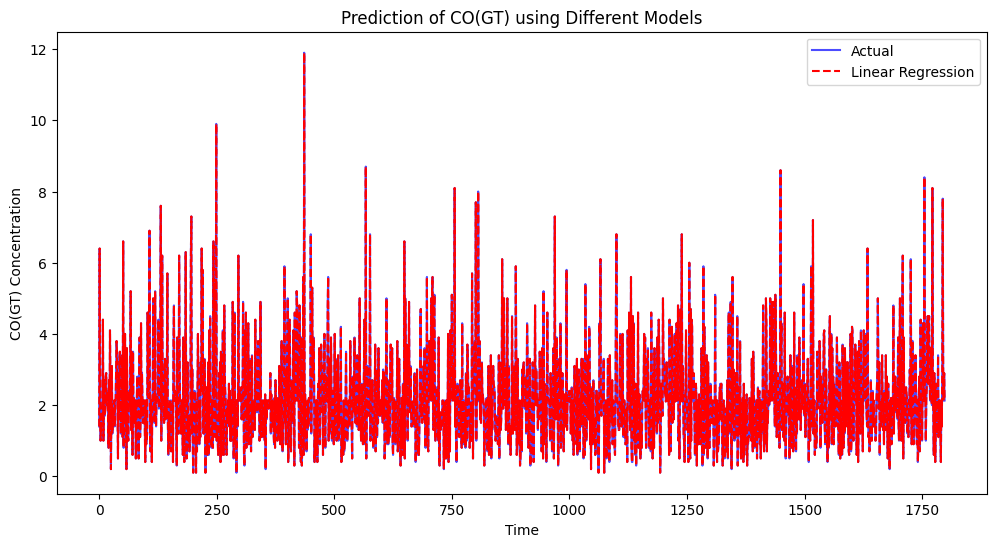

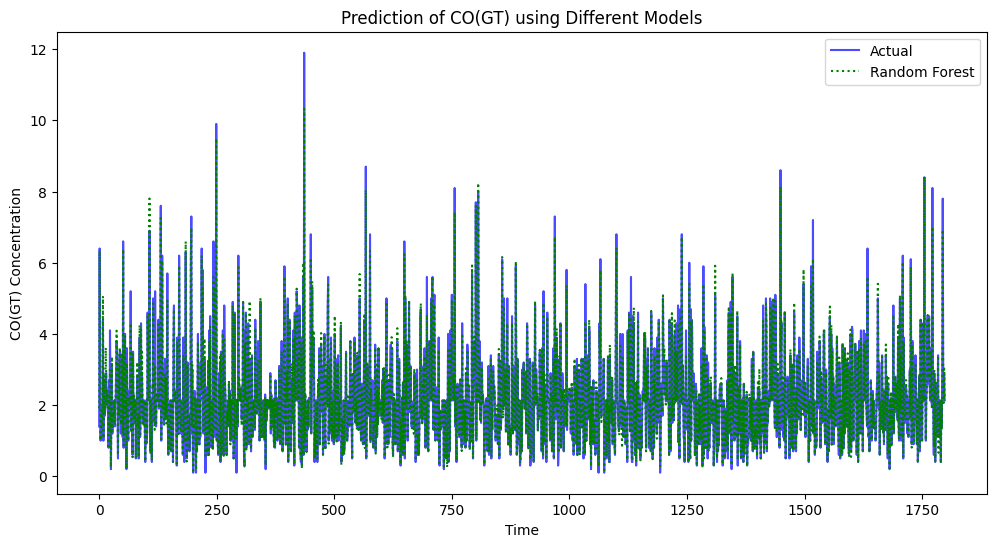

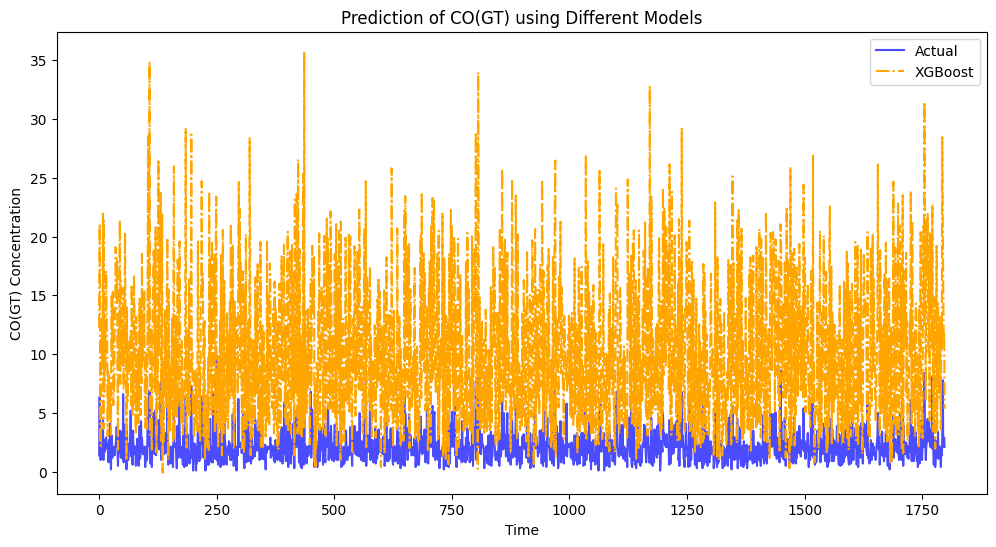

Linear Regression - MSE: 6909.13, MAE: 60.48
Random Forest - MSE: 2284.46, MAE: 25.12


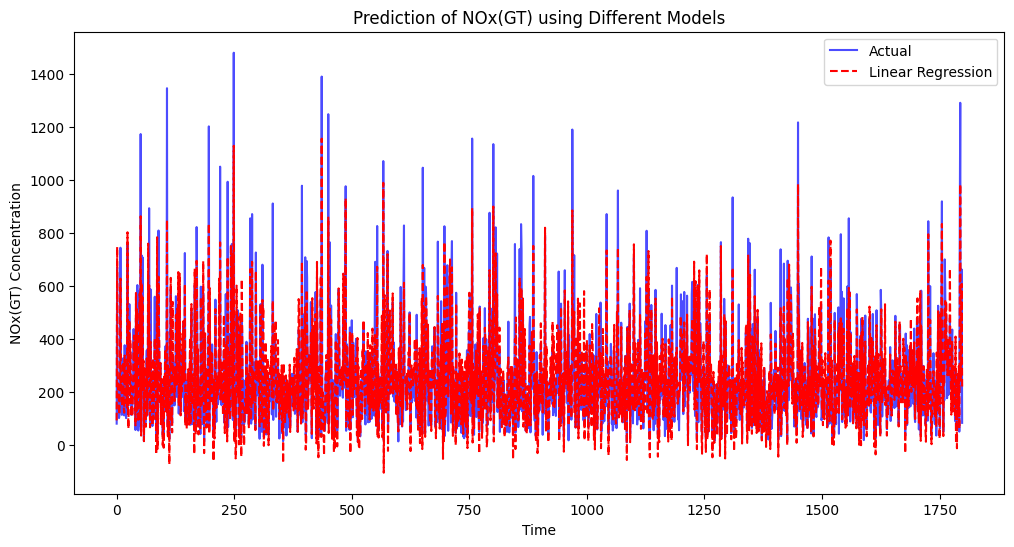

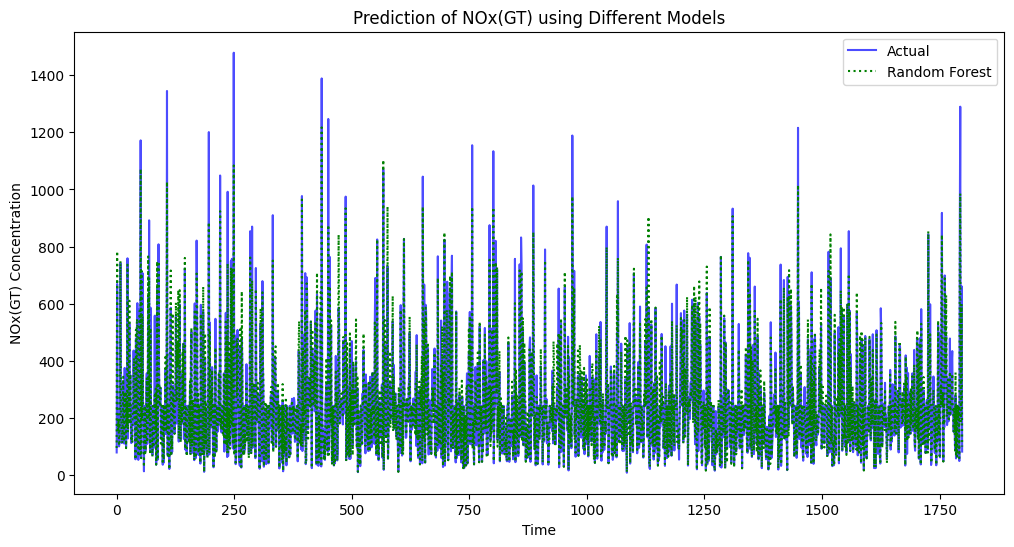

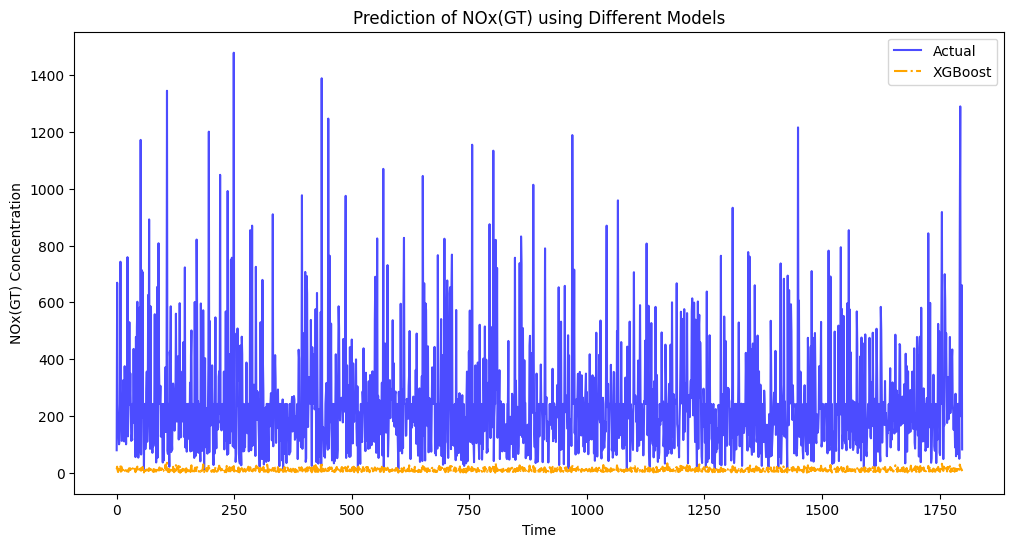

Linear Regression - MSE: 15.11, MAE: 2.52
Random Forest - MSE: 4.80, MAE: 1.40


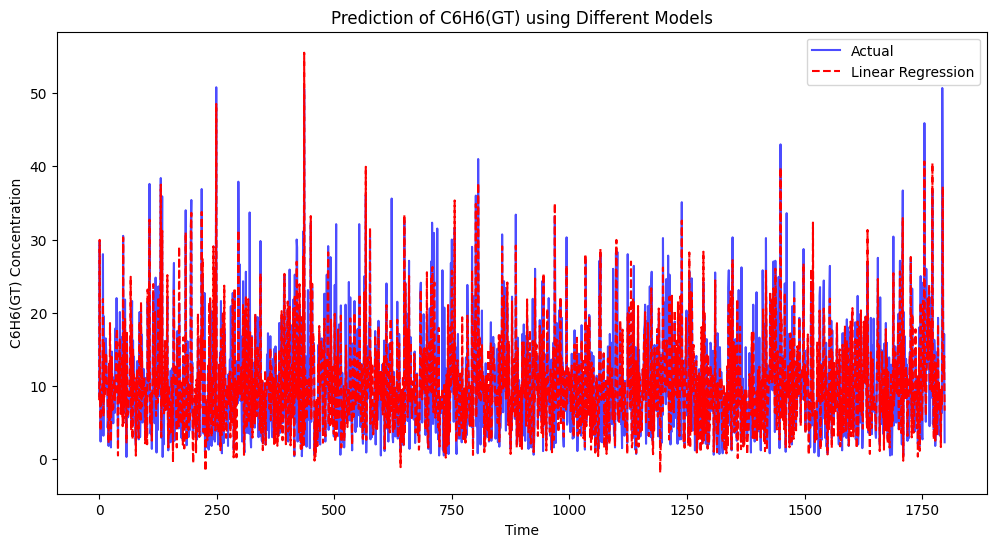

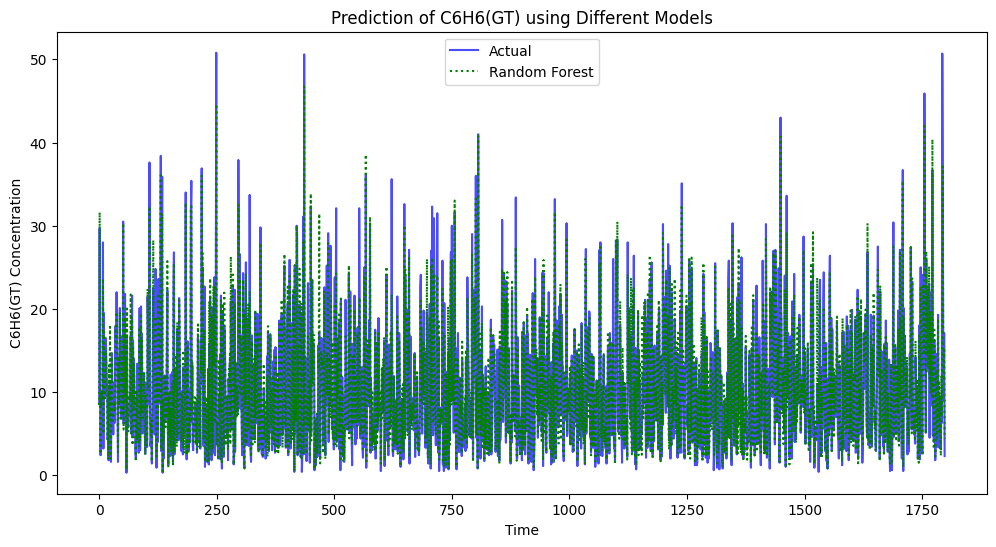

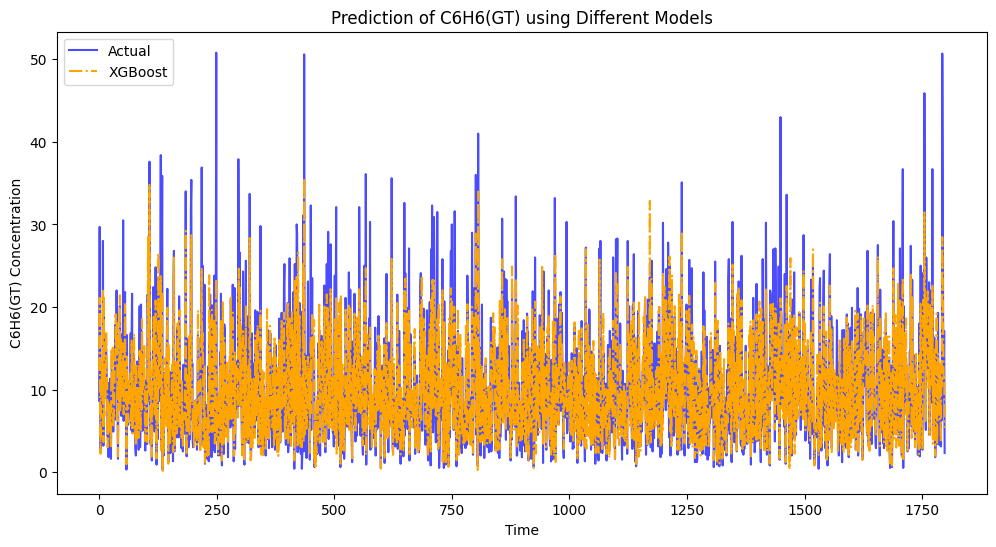

In [ ]:
# Model prediction

# Feature engineering
# Extract time-based features
df['year'] = df['DateTime'].dt.year
df['month'] = df['DateTime'].dt.month
df['day'] = df['DateTime'].dt.day
df['day_of_week'] = df['DateTime'].dt.dayofweek
df['day_of_year'] = df['DateTime'].dt.dayofyear
df['hour'] = df['DateTime'].dt.hour

# Creating lag features for CO, NOx, and Benzene
for lag in [1, 2, 3, 6, 12, 24]:
    df[f"CO_lag_{lag}"] = df["CO(GT)"].shift(lag)
    df[f"NOx_lag_{lag}"] = df["NOx(GT)"].shift(lag)
    df[f"Benzene_lag_{lag}"] = df["C6H6(GT)"].shift(lag)

# Creating rolling statistics (rolling mean and std deviation)
for window in [3, 6, 12]:
    df[f"CO_roll_mean_{window}"] = df["CO(GT)"].rolling(window=window).mean()
    df[f"CO_roll_std_{window}"] = df["CO(GT)"].rolling(window=window).std()
    df[f"NOx_roll_mean_{window}"] = df["NOx(GT)"].rolling(window=window).mean()
    df[f"NOx_roll_std_{window}"] = df["NOx(GT)"].rolling(window=window).std()
    df[f"Benzene_roll_mean_{window}"] = df["C6H6(GT)"].rolling(window=window).mean()
    df[f"Benzene_roll_std_{window}"] = df["C6H6(GT)"].rolling(window=window).std()

df.fillna(method='bfill', inplace=True)

# Fit model for CO
target_pollutant = 'CO(GT)'
#features = [col for col in df.columns if col != target_pollutant]
features = ['year', 'month', 'day', 'day_of_week', 'day_of_year', 'hour', 'CO_lag_1', 'CO_lag_2', 'CO_lag_3', 'CO_lag_6', 'CO_lag_12', 'CO_lag_24', 'CO_roll_mean_3', 'CO_roll_mean_6', 'CO_roll_mean_12', 'CO_roll_std_3', 'CO_roll_std_6', 'CO_roll_std_12', 'NOx(GT)', 'C6H6(GT)']
X = df[features]
y = df[target_pollutant]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and Evaluate Models

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{model_name} - MSE: {mse:.2f}, MAE: {mae:.2f}")
    return y_pred

# 1. Linear Regression
lr_model = LinearRegression()
y_pred_lr = evaluate_model(lr_model, X_train, X_test, y_train, y_test, "Linear Regression")

# 2. Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
y_pred_rf = evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest")

# Visualize Predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", color="blue", alpha=0.7)
plt.plot(y_pred_lr, label="Linear Regression", linestyle="dashed", color="red")
plt.legend()
plt.title(f"Prediction of {target_pollutant} using Different Models")
plt.xlabel("Time")
plt.ylabel(f"{target_pollutant} Concentration")
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", color="blue", alpha=0.7)
plt.plot(y_pred_rf, label="Random Forest", linestyle="dotted", color="green")
plt.legend()
plt.title(f"Prediction of {target_pollutant} using Different Models")
plt.xlabel("Time")
plt.ylabel(f"{target_pollutant} Concentration")
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", color="blue", alpha=0.7)
plt.plot(y_pred_xgb, label="XGBoost", linestyle="dashdot", color="orange")
plt.legend()
plt.title(f"Prediction of {target_pollutant} using Different Models")
plt.xlabel("Time")
plt.ylabel(f"{target_pollutant} Concentration")
plt.show()

# Fit model for NOx
target_pollutant = 'NOx(GT)'
#features = [col for col in df.columns if col != target_pollutant]
features = ['year', 'month', 'day', 'day_of_week', 'day_of_year', 'hour', 'CO_lag_1', 'CO_lag_2', 'CO_lag_3', 'CO_lag_6', 'CO_lag_12', 'CO_lag_24', 'CO_roll_mean_3', 'CO_roll_mean_6', 'CO_roll_mean_12', 'CO_roll_std_3', 'CO_roll_std_6', 'CO_roll_std_12', 'CO(GT)', 'NO2(GT)']
X = df[features]
y = df[target_pollutant]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and Evaluate Models

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{model_name} - MSE: {mse:.2f}, MAE: {mae:.2f}")
    return y_pred

# 1. Linear Regression
lr_model = LinearRegression()
y_pred_lr = evaluate_model(lr_model, X_train, X_test, y_train, y_test, "Linear Regression")

# 2. Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
y_pred_rf = evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest")

# Visualize Predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", color="blue", alpha=0.7)
plt.plot(y_pred_lr, label="Linear Regression", linestyle="dashed", color="red")
plt.legend()
plt.title(f"Prediction of {target_pollutant} using Different Models")
plt.xlabel("Time")
plt.ylabel(f"{target_pollutant} Concentration")
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", color="blue", alpha=0.7)
plt.plot(y_pred_rf, label="Random Forest", linestyle="dotted", color="green")
plt.legend()
plt.title(f"Prediction of {target_pollutant} using Different Models")
plt.xlabel("Time")
plt.ylabel(f"{target_pollutant} Concentration")
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", color="blue", alpha=0.7)
plt.plot(y_pred_xgb, label="XGBoost", linestyle="dashdot", color="orange")
plt.legend()
plt.title(f"Prediction of {target_pollutant} using Different Models")
plt.xlabel("Time")
plt.ylabel(f"{target_pollutant} Concentration")
plt.show()

# Fit model for Benzene
target_pollutant = 'C6H6(GT)'
#features = [col for col in df.columns if col != target_pollutant]
features = ['year', 'month', 'day', 'day_of_week', 'day_of_year', 'hour', 'CO_lag_1', 'CO_lag_2', 'CO_lag_3', 'CO_lag_6', 'CO_lag_12', 'CO_lag_24', 'CO_roll_mean_3', 'CO_roll_mean_6', 'CO_roll_mean_12', 'CO_roll_std_3', 'CO_roll_std_6', 'CO_roll_std_12', 'CO(GT)']
X = df[features]
y = df[target_pollutant]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and Evaluate Models

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{model_name} - MSE: {mse:.2f}, MAE: {mae:.2f}")
    return y_pred

# 1. Linear Regression
lr_model = LinearRegression()
y_pred_lr = evaluate_model(lr_model, X_train, X_test, y_train, y_test, "Linear Regression")

# 2. Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
y_pred_rf = evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest")

# Visualize Predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", color="blue", alpha=0.7)
plt.plot(y_pred_lr, label="Linear Regression", linestyle="dashed", color="red")
plt.legend()
plt.title(f"Prediction of {target_pollutant} using Different Models")
plt.xlabel("Time")
plt.ylabel(f"{target_pollutant} Concentration")
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", color="blue", alpha=0.7)
plt.plot(y_pred_rf, label="Random Forest", linestyle="dotted", color="green")
plt.legend()
plt.title(f"Prediction of {target_pollutant} using Different Models")
plt.xlabel("Time")
plt.ylabel(f"{target_pollutant} Concentration")
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual", color="blue", alpha=0.7)
plt.plot(y_pred_xgb, label="XGBoost", linestyle="dashdot", color="orange")
plt.legend()
plt.title(f"Prediction of {target_pollutant} using Different Models")
plt.xlabel("Time")
plt.ylabel(f"{target_pollutant} Concentration")
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index

SARIMA - MSE: 1.91, MAE: 1.00


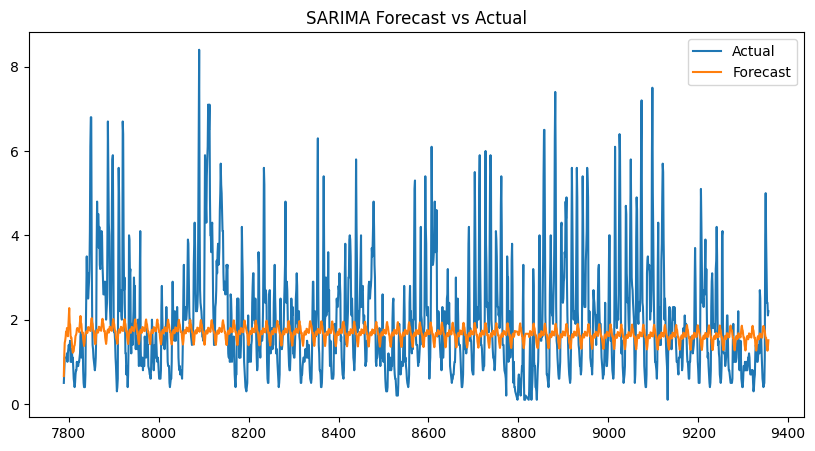

In [43]:
# Assuming `df` is your preprocessed DataFrame and datetime is the index
ts_co = df['CO(GT)'].replace(-200, np.nan).dropna()

# Train-test split (80-20 chronological)
train_size = int(len(ts_co) * 0.8)
train, test = ts_co[:train_size], ts_co[train_size:]

# Fit SARIMA model
model = SARIMAX(train, order=(2,1,2), seasonal_order=(1,1,1,24))
sarima_result = model.fit(disp=False)

# Forecast
forecast = sarima_result.forecast(steps=len(test))

# Evaluation
mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)

print(f"SARIMA - MSE: {mse:.2f}, MAE: {mae:.2f}")

# Plot
plt.figure(figsize=(10, 5))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.title('SARIMA Forecast vs Actual')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizati

SARIMA - MSE: 67759.35, MAE: 230.59


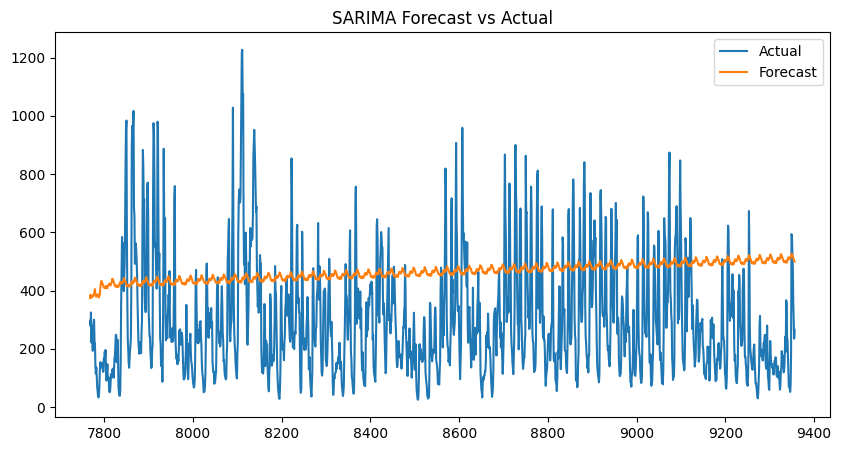

In [44]:
# Assuming `df` is your preprocessed DataFrame and datetime is the index
ts_co = df['NOx(GT)'].replace(-200, np.nan).dropna()

# Train-test split (80-20 chronological)
train_size = int(len(ts_co) * 0.8)
train, test = ts_co[:train_size], ts_co[train_size:]

# Fit SARIMA model
model = SARIMAX(train, order=(2,1,2), seasonal_order=(1,1,1,24))
sarima_result = model.fit(disp=False)

# Forecast
forecast = sarima_result.forecast(steps=len(test))

# Evaluation
mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)

print(f"SARIMA - MSE: {mse:.2f}, MAE: {mae:.2f}")

# Plot
plt.figure(figsize=(10, 5))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.title('SARIMA Forecast vs Actual')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index

SARIMA - MSE: 73.99, MAE: 7.23


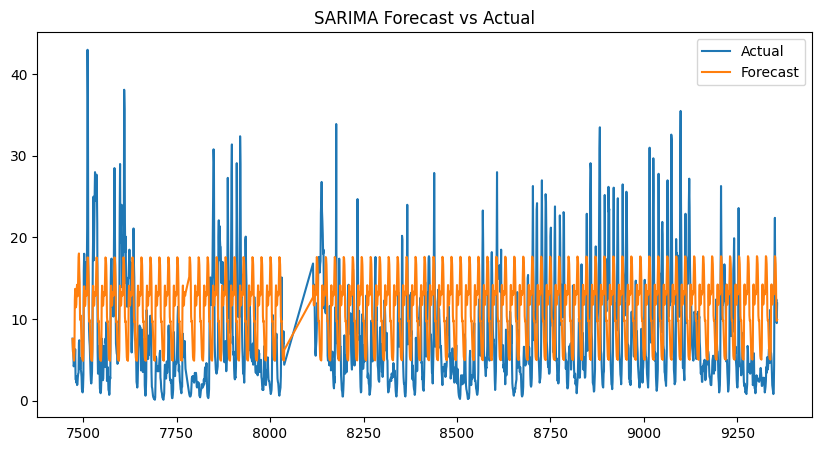

In [42]:
# Assuming `df` is your preprocessed DataFrame and datetime is the index
ts_co = df['C6H6(GT)'].replace(-200, np.nan).dropna()

# Train-test split (80-20 chronological)
train_size = int(len(ts_co) * 0.8)
train, test = ts_co[:train_size], ts_co[train_size:]

# Fit SARIMA model
model = SARIMAX(train, order=(2,1,2), seasonal_order=(1,1,1,24))
sarima_result = model.fit(disp=False)

# Forecast
forecast = sarima_result.forecast(steps=len(test))

# Evaluation
mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)

print(f"SARIMA - MSE: {mse:.2f}, MAE: {mae:.2f}")

# Plot
plt.figure(figsize=(10, 5))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.title('SARIMA Forecast vs Actual')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0109 - val_loss: 0.0064
Epoch 2/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0057 - val_loss: 0.0044
Epoch 3/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 4/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0038 - val_loss: 0.0040
Epoch 5/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0036 - val_loss: 0.0038
Epoch 6/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0036 - val_loss: 0.0038
Epoch 7/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0037 - val_loss: 0.0043
Epoch 8/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0035 - val_loss: 0.0043
Epoch 9/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0037 - val_loss: 0.0038
Epoch 10/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0034 - val_loss: 0.0038
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
LSTM - MSE: 0.53, MAE: 0.51


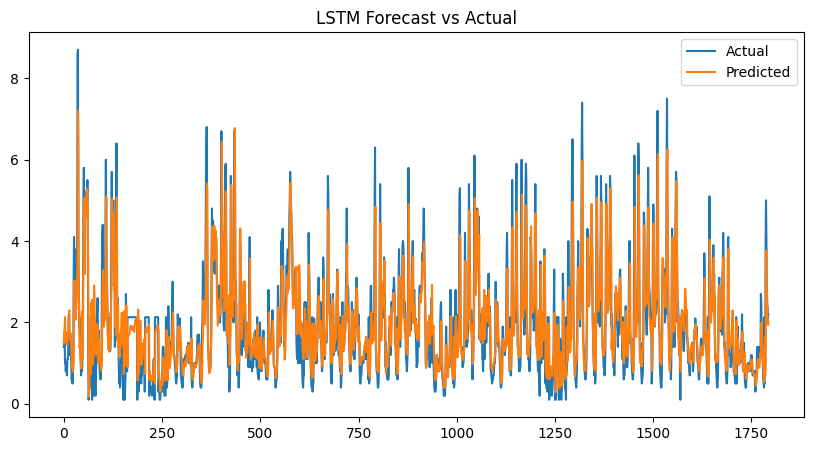

In [ ]:
# Prepare time series
data = df['CO(GT)'].replace(-200, np.nan).dropna().values.reshape(-1, 1)

# Normalize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, time_steps=24):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

TIME_STEPS = 24
X, y = create_sequences(scaled_data, TIME_STEPS)

# Split data
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# LSTM model
model = Sequential([
    LSTM(64, input_shape=(TIME_STEPS, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Predict
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Evaluation
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)

print(f"LSTM - MSE: {mse:.2f}, MAE: {mae:.2f}")

# Plot
plt.figure(figsize=(10, 5))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(y_pred_rescaled, label='Predicted')
plt.title('LSTM Forecast vs Actual')
plt.legend()
plt.show()

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


202/202 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - loss: 0.0093 - val_loss: 0.0093
Epoch 2/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0044 - val_loss: 0.0090
Epoch 3/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0039 - val_loss: 0.0061
Epoch 4/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0033 - val_loss: 0.0055
Epoch 5/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0033 - val_loss: 0.0053
Epoch 6/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0029 - val_loss: 0.0055
Epoch 7/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0031 - val_loss: 0.0068
Epoch 8/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0031 - val_loss: 0.0052
Epoch 9/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0029 - val_loss: 0.0058
Epoch 10/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0029 - val_loss: 0.0051
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
LSTM - MSE: 10821.67, MAE: 72.41


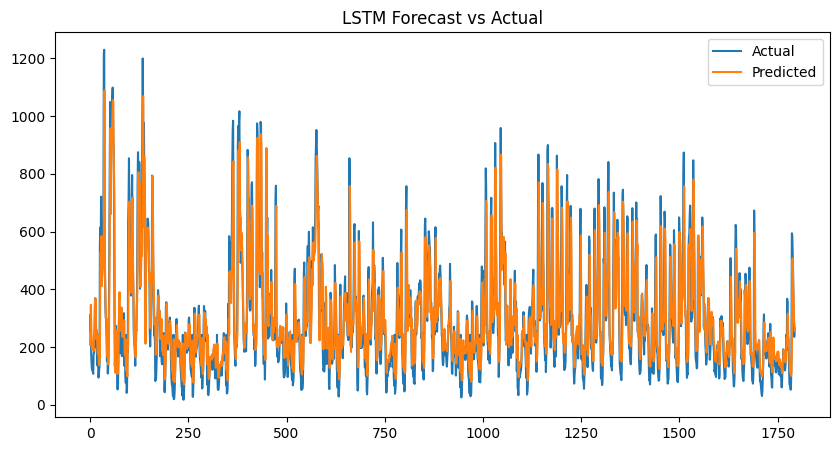

In [ ]:
# Prepare time series
data = df['NOx(GT)'].replace(-200, np.nan).dropna().values.reshape(-1, 1)

# Normalize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, time_steps=24):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

TIME_STEPS = 24
X, y = create_sequences(scaled_data, TIME_STEPS)

# Split data
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# LSTM model
model = Sequential([
    LSTM(64, input_shape=(TIME_STEPS, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Predict
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Evaluation
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)

print(f"LSTM - MSE: {mse:.2f}, MAE: {mae:.2f}")

# Plot
plt.figure(figsize=(10, 5))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(y_pred_rescaled, label='Predicted')
plt.title('LSTM Forecast vs Actual')
plt.legend()
plt.show()

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


202/202 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0117 - val_loss: 0.0050
Epoch 2/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0059 - val_loss: 0.0047
Epoch 3/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0044 - val_loss: 0.0027
Epoch 4/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0039 - val_loss: 0.0027
Epoch 5/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0037 - val_loss: 0.0030
Epoch 6/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0037 - val_loss: 0.0028
Epoch 7/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0038 - val_loss: 0.0026
Epoch 8/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0036 - val_loss: 0.0026
Epoch 9/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0036 - val_loss: 0.0025
Epoch 10/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0032 - val_loss: 0.0025
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
LSTM - MSE: 9.43, MAE: 2.10


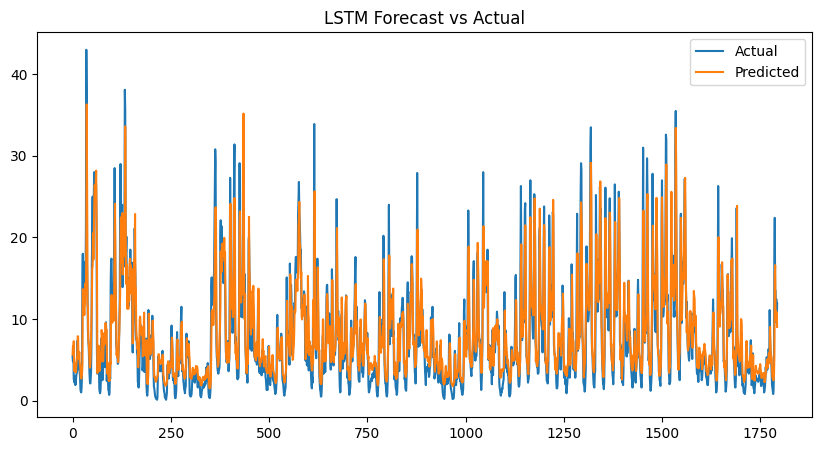

In [ ]:
# Prepare time series
data = df['C6H6(GT)'].replace(-200, np.nan).dropna().values.reshape(-1, 1)

# Normalize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, time_steps=24):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

TIME_STEPS = 24
X, y = create_sequences(scaled_data, TIME_STEPS)

# Split data
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

# LSTM model
model = Sequential([
    LSTM(64, input_shape=(TIME_STEPS, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Predict
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Evaluation
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)

print(f"LSTM - MSE: {mse:.2f}, MAE: {mae:.2f}")

# Plot
plt.figure(figsize=(10, 5))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(y_pred_rescaled, label='Predicted')
plt.title('LSTM Forecast vs Actual')
plt.legend()
plt.show()